In [ ]:
import tensorflow

from tensorflow.keras import models
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import TimeDistributed

import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
#from sklearn.metrics import confusion_matrix, plot_confusion_matrix
from tensorflow.keras.layers import Conv2D, MaxPooling2D, MaxPooling3D, Conv3D, Flatten, Dropout, Dense, BatchNormalization, Activation, GaussianNoise, LSTM
from sklearn.metrics import accuracy_score

import matplotlib.pyplot as plt
import seaborn as sns
import keras
from keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report,confusion_matrix
from keras.utils.np_utils import to_categorical
from keras.models import Model,Sequential, load_model
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, MaxPool3D, BatchNormalization, AveragePooling2D, GlobalAveragePooling2D
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
import tensorflow as tf
import cv2
import os
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip "/content/drive/MyDrive/RESEARCH CANCER/data_merged.zip"

Streaming output truncated to the last 5000 lines.
  inflating: content/MERGED_DATA/train/nevus/ISIC_0029214.jpg  
  inflating: content/MERGED_DATA/train/nevus/ISIC_0032627.jpg  
  inflating: content/MERGED_DATA/train/nevus/ISIC_0031279.jpg  
  inflating: content/MERGED_DATA/train/nevus/ISIC_0026020.jpg  
  inflating: content/MERGED_DATA/train/nevus/ISIC_0032361.jpg  
  inflating: content/MERGED_DATA/train/nevus/ISIC_0026320.jpg  
  inflating: content/MERGED_DATA/train/nevus/ISIC_0026367.jpg  
  inflating: content/MERGED_DATA/train/nevus/ISIC_0028948.jpg  
  inflating: content/MERGED_DATA/train/nevus/ISIC_0000387.jpg  
  inflating: content/MERGED_DATA/train/nevus/ISIC_0028768.jpg  
  inflating: content/MERGED_DATA/train/nevus/ISIC_0029785.jpg  
  inflating: content/MERGED_DATA/train/nevus/ISIC_0025172.jpg  
  inflating: content/MERGED_DATA/train/nevus/ISIC_0031466.jpg  
  inflating: content/MERGED_DATA/train/nevus/ISIC_0024468.jpg  
  inflating: content/MERGED_DATA/train/nevus/ISIC_003

In [ ]:
train_data_dir="/content/content/MERGED_DATA/train"
arr1=[]
for _ in os.listdir(train_data_dir):
  arr1.append(_)
  


In [ ]:
DATADIR='/content/content/MERGED_DATA/train'
CATEGORIES=arr1
DATADIR1="/content/content/MERGED_DATA/val"

Train Images

In [ ]:

import os
import math 

files={}
dir='/content/content/MERGED_DATA/train'
a=0
mul={}
arr1=[]
temp_1=[]
path = dir 
for _ in os.listdir(path):
  
  temp_1.append(_)
  x=os.path.join(path,_)
  z = os.listdir(x) 
  number_files = len(z)
  #number_files = len(list)
  
  print(_+' '+str(number_files))
  



  

nevus 4943
basal cell carcinoma 359
actinic keratosis 228
dermatofibroma 80
squamous cell carcinoma 126
melanoma 1085
vascular lesion 99
seborrheic keratosis 53
pigmented benign keratosis 769


Validation Images

In [ ]:

import os
import math 

files={}
dir='/content/content/MERGED_DATA/val'
a=0
mul={}
arr1=[]
path = dir 
for _ in os.listdir(path):
  
  
  x=os.path.join(path,_)
  z = os.listdir(x) 
  number_files = len(z)
  #number_files = len(list)
  
  print(_+' '+str(number_files))
  



  

nevus 1412
basal cell carcinoma 102
actinic keratosis 65
dermatofibroma 23
squamous cell carcinoma 36
melanoma 310
vascular lesion 28
seborrheic keratosis 15
pigmented benign keratosis 219


1st model

Preparing Dataset

In [ ]:
train_data=[]
val_data=[]
test_data=[]
img_size=50
def create_traning_data():
  for category in CATEGORIES:
    path=os.path.join(DATADIR,category)
    class_num=CATEGORIES.index(category)
    for img in os.listdir(path):
      try:
        img_arr=cv2.imread(os.path.join(path,img))
        
        new_arr=cv2.resize(img_arr,(img_size,img_size))
        new_arr=(new_arr/255.0).astype(np.float16)
        train_data.append([new_arr,class_num])
      except Exception as e:
        pass
def create_val_data():
  for category in CATEGORIES:
    path=os.path.join(DATADIR1,category)
    class_num=CATEGORIES.index(category)
    for img in os.listdir(path):
      try:
        img_arr=cv2.imread(os.path.join(path,img))
        
        new_arr=cv2.resize(img_arr,(img_size,img_size))
        new_arr=(new_arr/255.0).astype(np.float16)
        val_data.append([new_arr,class_num])
      except Exception as e:
        pass
DATADIR2='/content/content/MERGED_DATA/test'
def create_test_data():
  for category in CATEGORIES:
    path=os.path.join(DATADIR2,category)
    class_num=CATEGORIES.index(category)
    for img in os.listdir(path):
      try:
        img_arr=cv2.imread(os.path.join(path,img))
        
        new_arr=cv2.resize(img_arr,(img_size,img_size))
        new_arr=(new_arr/255.0).astype(np.float16)
        test_data.append([new_arr,class_num])
      except Exception as e:
        pass
create_val_data()
create_traning_data()
create_test_data()


Size of dataset

In [ ]:
print(len(train_data))
print(len(val_data))
print(len(test_data))

7742
2210
1153


In [ ]:
train_x=[]
train_y=[]
for features,label in train_data:
  train_x.append(features)
  train_y.append(label)
test_x=[]
test_y=[]
for features,label in test_data:
  test_x.append(features)
  test_y.append(label)
val_x=[]
val_y=[]
for features,label in val_data:
  val_x.append(features)
  val_y.append(label)


In [ ]:
del train_data
del test_data
del val_data

In [ ]:
train_x=np.array(train_x).reshape(-1,img_size,img_size,3)
test_x=np.array(test_x).reshape(-1,img_size,img_size,3)
val_x=np.array(val_x).reshape(-1,img_size,img_size,3)


In [ ]:
train_y=np.array(train_y)
test_y=np.array(test_y)
val_y=np.array(val_y)
print(train_y.shape)

(7742,)


In [ ]:
import random
def make_pairs(x, y):
    """Creates a tuple containing image pairs with corresponding label.

    Arguments:
        x: List containing images, each index in this list corresponds to one image.
        y: List containing labels, each label with datatype of `int`.

    Returns:
        Tuple containing two numpy arrays as (pairs_of_samples, labels),
        where pairs_of_samples' shape is (2len(x), 2,n_features_dims) and
        labels are a binary array of shape (2len(x)).
    """

    num_classes = max(y) + 1
    digit_indices = [np.where(y == i)[0] for i in range(num_classes)]

    pairs = []
    labels = []

    for idx1 in range(len(x)):
        # add a matching example
        x1 = x[idx1]
        label1 = y[idx1]
        idx2 = random.choice(digit_indices[label1])
        x2 = x[idx2]

        pairs += [[x1, x2]]
        labels += [0]

        # add a non-matching example
        label2 = random.randint(0, num_classes - 1)
        while label2 == label1:
            label2 = random.randint(0, num_classes - 1)

        idx2 = random.choice(digit_indices[label2])
        x2 = x[idx2]

        pairs += [[x1, x2]]
        labels += [1]

    return np.array(pairs), np.array(labels).astype("float32")


# make train pairs
pairs_train, labels_train = make_pairs(train_x, train_y)

# make validation pairs
pairs_val, labels_val = make_pairs(val_x, val_y)

# make test pairs
pairs_test, labels_test = make_pairs(test_x, test_y)

In [ ]:
x_train_1 = pairs_train[:, 0]  # x_train_1.shape is (219340, 25, 25, 3)
x_train_2 = pairs_train[:, 1]

In [ ]:
x_val_1 = pairs_val[:, 0]  # x_val_1.shape = (61674, 25, 25, 3)
x_val_2 = pairs_val[:, 1]

In [ ]:
x_test_1 = pairs_test[:, 0]  # x_test_1.shape = (61674, 25, 25, 3)
x_test_2 = pairs_test[:, 1]


In [ ]:
epochs = 50
batch_size = 32
margin = 1  # Margin for constrastive loss.

In [ ]:

def visualize(pairs, labels, to_show=6, num_col=3, predictions=None, test=False):
    

    
    num_row = to_show // num_col if to_show // num_col != 0 else 1


    to_show = num_row * num_col

    # Plot the images
    fig, axes = plt.subplots(num_row, num_col, figsize=(5, 5))
    
    for i in range(to_show):

        # If the number of rows is 1, the axes array is one-dimensional
        if num_row == 1:
            ax = axes[i % num_col]
        else:
            ax = axes[i // num_col, i % num_col]
        im1=np.array(pairs[i][0])*255
        im1=im1.astype(np.uint8)
        im2=np.array(pairs[i][1])*255
        im2=im2.astype(np.uint8)

        ax.imshow(tf.concat([im1, im2], axis=1), cmap="gray")
        ax.set_axis_off()
        if test:
            ax.set_title("True: {} | Pred: {:.5f}".format(labels[i], predictions[i][0]))
        else:
            ax.set_title("Label: {}".format(labels[i]))
    if test:
        plt.tight_layout(rect=(0, 0, 1.9, 1.9), w_pad=0.0)
    else:
        plt.tight_layout(rect=(0, 0, 1.5, 1.5))
    plt.show()
    

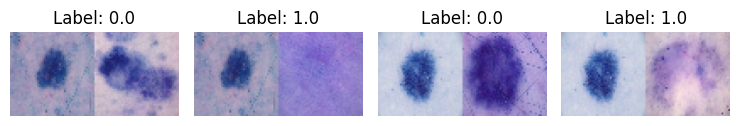

In [ ]:
visualize(pairs_train[:40], labels_train[:40], to_show=4, num_col=4)

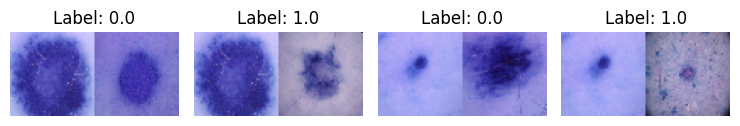

In [ ]:
visualize(pairs_val[:-1], labels_val[:-1], to_show=4, num_col=4)

In [ ]:
del train_x,train_y,val_x,val_y,test_x,test_y

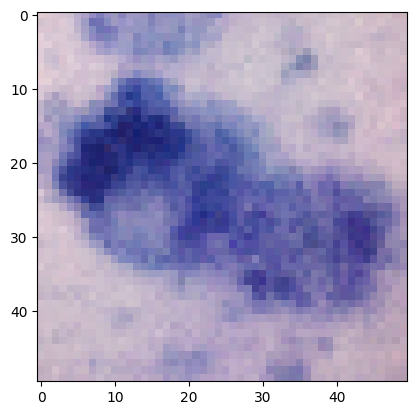

In [ ]:
for i in pairs_train:
  t=i[1]
  t=np.array(t)*255
  t=t.astype(np.uint8)
    
  plt.imshow(t)
  plt.show()
  break

In [ ]:
from tensorflow.keras import layers
from keras.applications.vgg16 import VGG16
# Provided two tensors t1 and t2
# Euclidean distance = sqrt(sum(square(t1-t2)))
def euclidean_distance(vects):

    x, y = vects
    sum_square = tf.math.reduce_sum(tf.math.square(x - y), axis=1, keepdims=True)
    return tf.math.sqrt(tf.math.maximum(sum_square, tf.keras.backend.epsilon()))


input = layers.Input((50, 50, 3))
x = tf.keras.layers.BatchNormalization()(input)
x = layers.Conv2D(32, (3, 3), activation="relu",padding='same')(input)
x = tf.keras.layers.BatchNormalization()(x)
x = layers.MaxPooling2D(pool_size=(2, 2),padding='same')(x)
x = layers.Conv2D(64, (3, 3), activation="relu",padding='same')(x)
x = tf.keras.layers.BatchNormalization()(x)
x = layers.MaxPooling2D(pool_size=(2, 2),padding='same')(x)
x = layers.Conv2D(128, (3, 3), activation="relu",padding='same')(x)
x = tf.keras.layers.BatchNormalization()(x)
x = layers.MaxPooling2D(pool_size=(2, 2),padding='same')(x)
x = layers.Conv2D(256, (3, 3), activation="relu",padding='same')(x)

x = layers.Flatten()(x)
x = tf.keras.layers.BatchNormalization()(x)
x = layers.Dense(256, activation="relu")(x)

embedding_network = keras.Model(input, x)


input_1 = layers.Input((50, 50, 3))
input_2 = layers.Input((50, 50, 3))

# As mentioned above, Siamese Network share weights between
# tower networks (sister networks). To allow this, we will use
# same embedding network for both tower networks.
tower_1 = embedding_network(input_1)
tower_2 = embedding_network(input_2)

merge_layer = layers.Lambda(euclidean_distance)([tower_1, tower_2])
normal_layer = tf.keras.layers.BatchNormalization()(merge_layer)
output_layer = layers.Dense(1, activation="sigmoid")(normal_layer)
siamese = keras.Model(inputs=[input_1, input_2], outputs=output_layer)


In [ ]:

def loss(margin=1):
    """Provides 'constrastive_loss' an enclosing scope with variable 'margin'.

    Arguments:
        margin: Integer, defines the baseline for distance for which pairs
                should be classified as dissimilar. - (default is 1).

    Returns:
        'constrastive_loss' function with data ('margin') attached.
    """

    # Contrastive loss = mean( (1-true_value) * square(prediction) +
    #                         true_value * square( max(margin-prediction, 0) ))
    def contrastive_loss(y_true, y_pred):
        """Calculates the constrastive loss.

        Arguments:
            y_true: List of labels, each label is of type float32.
            y_pred: List of predictions of same length as of y_true,
                    each label is of type float32.

        Returns:
            A tensor containing constrastive loss as floating point value.
        """

        square_pred = tf.math.square(y_pred)
        margin_square = tf.math.square(tf.math.maximum(margin - (y_pred), 0))
        return tf.math.reduce_mean(
            (1 - y_true) * square_pred + (y_true) * margin_square
        )

    return contrastive_loss


In [ ]:
margin=1
siamese.compile(loss=loss(margin=margin), optimizer="adam", metrics=["accuracy"])
siamese.summary()


Model: "model_9"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_14 (InputLayer)          [(None, 50, 50, 3)]  0           []                               
                                                                                                  
 input_15 (InputLayer)          [(None, 50, 50, 3)]  0           []                               
                                                                                                  
 model_8 (Functional)           (None, 256)          3651008     ['input_14[0][0]',               
                                                                  'input_15[0][0]']               
                                                                                                  
 lambda_4 (Lambda)              (None, 1)            0           ['model_8[0][0]',          

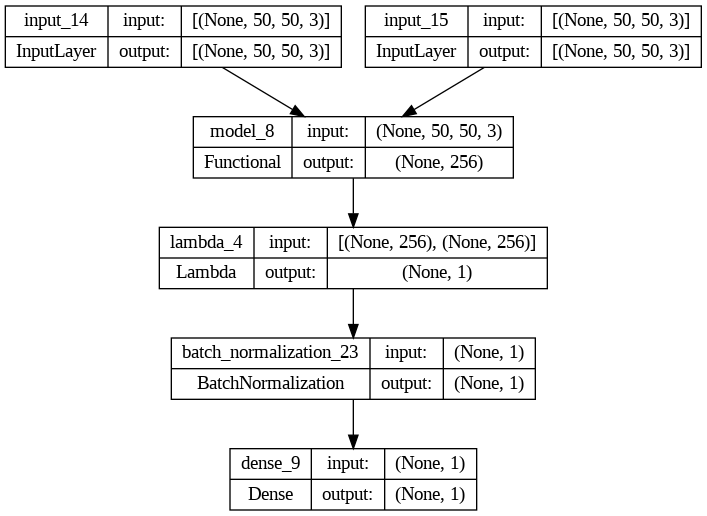

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(siamese, 'compress.png', show_shapes=True)

In [ ]:
epochs=200
history = siamese.fit(
    [x_train_1, x_train_2],
    labels_train,
    validation_data=([x_val_1, x_val_2], labels_val),
    batch_size=batch_size,
    epochs=epochs
)

Epoch 1/200
484/484 [==============================] - 13s 18ms/step - loss: 0.2288 - accuracy: 0.6265 - val_loss: 0.2225 - val_accuracy: 0.6439
Epoch 2/200
484/484 [==============================] - 7s 14ms/step - loss: 0.2110 - accuracy: 0.6693 - val_loss: 0.2062 - val_accuracy: 0.6762
Epoch 3/200
484/484 [==============================] - 8s 16ms/step - loss: 0.1964 - accuracy: 0.7027 - val_loss: 0.1968 - val_accuracy: 0.7027
Epoch 4/200
484/484 [==============================] - 7s 14ms/step - loss: 0.1813 - accuracy: 0.7328 - val_loss: 0.2324 - val_accuracy: 0.6335
Epoch 5/200
484/484 [==============================] - 7s 15ms/step - loss: 0.1688 - accuracy: 0.7550 - val_loss: 0.1933 - val_accuracy: 0.7018
Epoch 6/200
484/484 [==============================] - 7s 14ms/step - loss: 0.1545 - accuracy: 0.7782 - val_loss: 0.2093 - val_accuracy: 0.6805
Epoch 7/200
484/484 [==============================] - 7s 15ms/step - loss: 0.1430 - accuracy: 0.7991 - val_loss: 0.2043 - val_accuracy

In [ ]:
len(x_val_1)

2306

In [ ]:
from keras.models import load_model
siamese.save('/content/drive/MyDrive/RESEARCH CANCER/main_model5.h5')

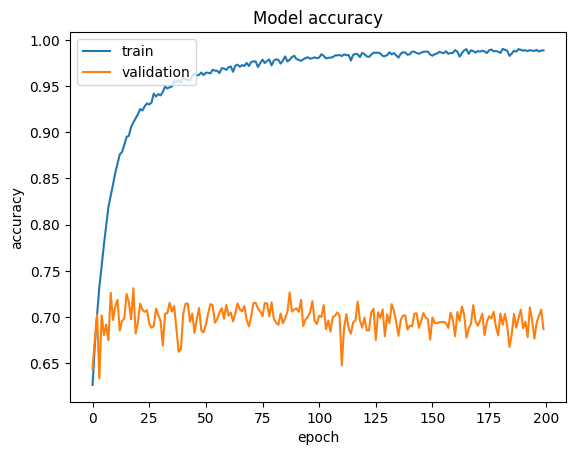

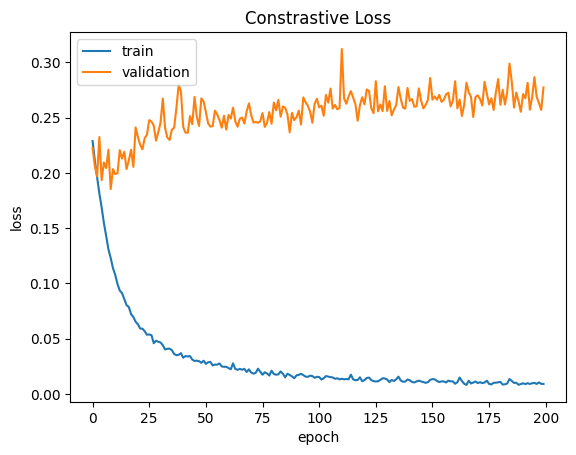

In [ ]:

def plt_metric(history, metric, title, has_valid=True):
    """Plots the given 'metric' from 'history'.

    Arguments:
        history: history attribute of History object returned from Model.fit.
        metric: Metric to plot, a string value present as key in 'history'.
        title: A string to be used as title of plot.
        has_valid: Boolean, true if valid data was passed to Model.fit else false.

    Returns:
        None.
    """
    plt.plot(history[metric])
    if has_valid:
        plt.plot(history["val_" + metric])
        plt.legend(["train", "validation"], loc="upper left")
    plt.title(title)
    plt.ylabel(metric)
    plt.xlabel("epoch")
    plt.show()


# Plot the accuracy
plt_metric(history=siamese.history.history, metric="accuracy", title="Model accuracy")

# Plot the constrastive loss
plt_metric(history=siamese.history.history, metric="loss", title="Constrastive Loss")

In [ ]:
from keras.models import load_model
siamese=load_model('/content/drive/MyDrive/RESEARCH CANCER/main_model5.h5',compile=False)
siamese.compile(loss=loss(margin=margin), optimizer="adam", metrics=["accuracy"])

In [ ]:
results = siamese.evaluate([x_test_1, x_test_2], labels_test)
print("test loss, test acc:", results)

73/73 [==============================] - 1s 9ms/step - loss: 0.3082 - accuracy: 0.6500
test loss, test acc: [0.3082224726676941, 0.6500433683395386]


139/139 [==============================] - 1s 5ms/step


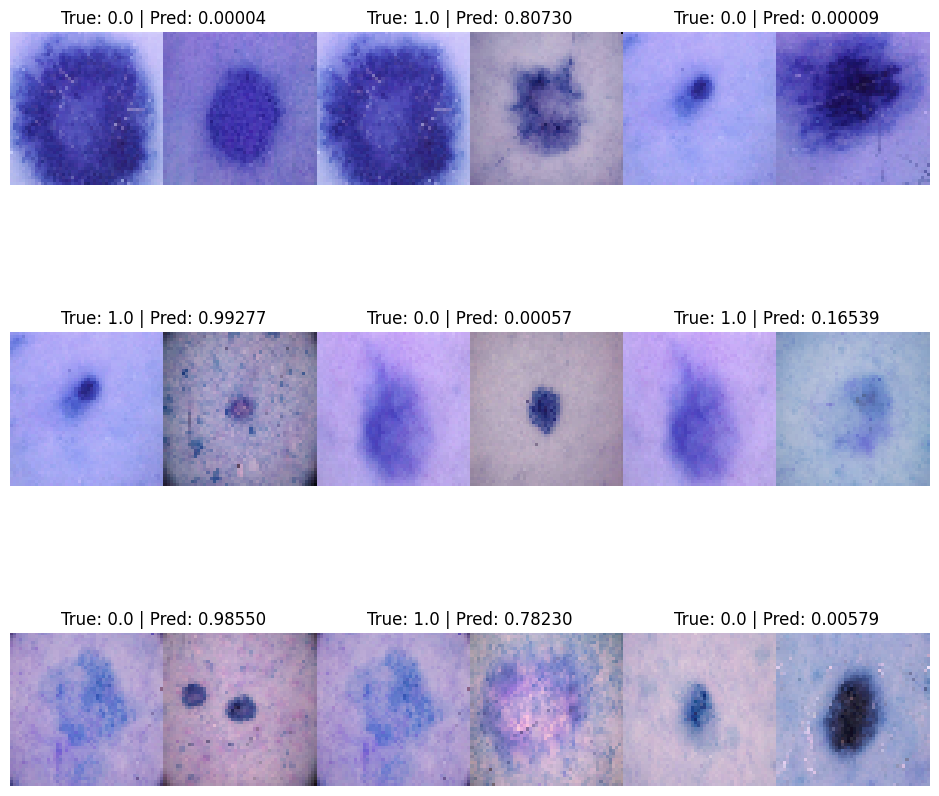

In [ ]:
predictions = siamese.predict([x_val_1, x_val_2])
visualize(pairs_val, labels_val, to_show=10, predictions=predictions, test=True)

In [ ]:
for i in range(len(predictions)):
  if predictions[i]<=0.8:
    predictions[i]=0
  else:
    predictions[i]=1

Validation dataset

In [ ]:
from sklearn import metrics
print(metrics.classification_report(predictions, labels_val))

              precision    recall  f1-score   support

         0.0       0.76      0.66      0.71      2560
         1.0       0.60      0.72      0.66      1860

    accuracy                           0.68      4420
   macro avg       0.68      0.69      0.68      4420
weighted avg       0.69      0.68      0.68      4420



In [ ]:
predictions = siamese.predict([x_test_1, x_test_2])

73/73 [==============================] - 0s 4ms/step


In [ ]:
for i in range(len(predictions)):
  if predictions[i]<=0.8:
    predictions[i]=0
  else:
    predictions[i]=1

Test dataset

In [ ]:
from sklearn import metrics
print(metrics.classification_report(predictions, labels_test))

              precision    recall  f1-score   support

         0.0       0.74      0.63      0.68      1349
         1.0       0.57      0.69      0.62       957

    accuracy                           0.65      2306
   macro avg       0.65      0.66      0.65      2306
weighted avg       0.67      0.65      0.66      2306



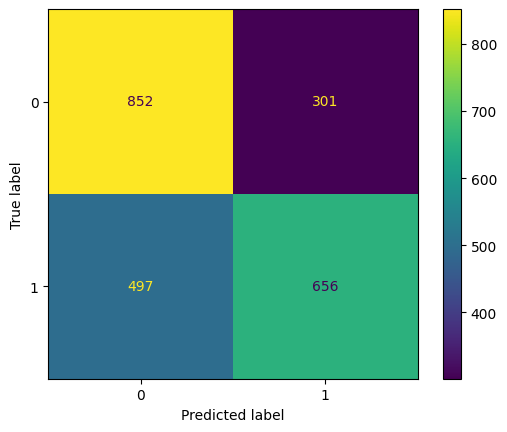

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn import metrics
conf_mat = confusion_matrix(labels_test, predictions)

# Print the confusion matrix
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = conf_mat, display_labels = ['0','1'])

cm_display.plot()
plt.show()

Trying 2nd model

In [ ]:
traning_data=[]
val_data=[]
img_size=50
def create_traning_data():
  for category in CATEGORIES:
    path=os.path.join(DATADIR,category)
    class_num=CATEGORIES.index(category)
    for img in os.listdir(path):
      try:
        img_arr=cv2.imread(os.path.join(path,img))
        
        new_arr=cv2.resize(img_arr,(img_size,img_size))
        new_arr=(new_arr/255.0).astype(np.float16)
        traning_data.append([new_arr,class_num])
      except Exception as e:
        pass
def create_val_data():
  for category in CATEGORIES:
    path=os.path.join(DATADIR1,category)
    class_num=CATEGORIES.index(category)
    for img in os.listdir(path):
      try:
        img_arr=cv2.imread(os.path.join(path,img))
        
        new_arr=cv2.resize(img_arr,(img_size,img_size))
        new_arr=(new_arr/255.0).astype(np.float16)
        traning_data.append([new_arr,class_num])
      except Exception as e:
        pass
pt='/content/content/MERGED_DATA/test'
def test_data():
  for category in CATEGORIES:
    path=os.path.join(pt,category)
    class_num=CATEGORIES.index(category)
    for img in os.listdir(path):
      try:
        img_arr=cv2.imread(os.path.join(path,img))
        
        new_arr=cv2.resize(img_arr,(img_size,img_size))
        new_arr=(new_arr/255.0).astype(np.float16)
        val_data.append([new_arr,class_num])
      except Exception as e:
        pass

create_val_data()
create_traning_data()
test_data()



In [ ]:
print(len(traning_data))
print(len(val_data))

9952
1153


In [ ]:
train_x=[]
train_y=[]
for features,label in traning_data:
  train_x.append(features)
  train_y.append(label)


val_x=[]
val_y=[]
for features,label in val_data:
  val_x.append(features)
  val_y.append(label)


In [ ]:
del traning_data
del val_data

In [ ]:
train_x=np.array(train_x).reshape(-1,img_size,img_size,3)

val_x=np.array(val_x).reshape(-1,img_size,img_size,3)


In [ ]:
train_y=np.array(train_y)

val_y=np.array(val_y)


In [ ]:
import random
def make_pairs(x, y):
    """Creates a tuple containing image pairs with corresponding label.

    Arguments:
        x: List containing images, each index in this list corresponds to one image.
        y: List containing labels, each label with datatype of `int`.

    Returns:
        Tuple containing two numpy arrays as (pairs_of_samples, labels),
        where pairs_of_samples' shape is (2len(x), 2,n_features_dims) and
        labels are a binary array of shape (2len(x)).
    """

    num_classes = max(y) + 1
    digit_indices = [np.where(y == i)[0] for i in range(num_classes)]

    pairs = []
    labels = []

    for idx1 in range(len(x)):
        # add a matching example
        x1 = x[idx1]
        label1 = y[idx1]
        idx2 = random.choice(digit_indices[label1])
        x2 = x[idx2]

        pairs += [[x1, x2]]
        labels += [0]

        # add a non-matching example
        label2 = random.randint(0, num_classes - 1)
        while label2 == label1:
            label2 = random.randint(0, num_classes - 1)

        idx2 = random.choice(digit_indices[label2])
        x2 = x[idx2]

        pairs += [[x1, x2]]
        labels += [1]

    return np.array(pairs), np.array(labels).astype("float32")


# make train pairs
pairs_train, labels_train = make_pairs(train_x, train_y)

# make validation pairs
pairs_val, labels_val = make_pairs(val_x, val_y)

# make test pairs


In [ ]:
epochs = 50
batch_size = 32
margin = 5  # Margin for constrastive loss.

In [ ]:
x_train_1 = pairs_train[:, 0]  # x_train_1.shape is (219340, 25, 25, 3)
x_train_2 = pairs_train[:, 1]
print(x_train_1.shape)
print(x_train_2.shape)

(19904, 50, 50, 3)
(19904, 50, 50, 3)


In [ ]:
x_val_1 = pairs_val[:, 0]  
x_val_2 = pairs_val[:, 1]
print(x_val_1.shape)
print(x_val_2.shape)

(2306, 50, 50, 3)
(2306, 50, 50, 3)


In [ ]:

def visualize(pairs, labels, to_show=6, num_col=3, predictions=None, test=False):
    """Creates a plot of pairs and labels, and prediction if it's test dataset.

    Arguments:
        pairs: Numpy Array, of pairs to visualize, having shape
               (Number of pairs, 2, 28, 28).
        to_show: Int, number of examples to visualize (default is 6)
                `to_show` must be an integral multiple of `num_col`.
                 Otherwise it will be trimmed if it is greater than num_col,
                 and incremented if if it is less then num_col.
        num_col: Int, number of images in one row - (default is 3)
                 For test and train respectively, it should not exceed 3 and 7.
        predictions: Numpy Array of predictions with shape (to_show, 1) -
                     (default is None)
                     Must be passed when test=True.
        test: Boolean telling whether the dataset being visualized is
              train dataset or test dataset - (default False).

    Returns:
        None.
    """

    # Define num_row
    # If to_show % num_col != 0
    #    trim to_show,
    #       to trim to_show limit num_row to the point where
    #       to_show % num_col == 0
    #
    # If to_show//num_col == 0
    #    then it means num_col is greater then to_show
    #    increment to_show
    #       to increment to_show set num_row to 1
    num_row = to_show // num_col if to_show // num_col != 0 else 1

    # `to_show` must be an integral multiple of `num_col`
    #  we found num_row and we have num_col
    #  to increment or decrement to_show
    #  to make it integral multiple of `num_col`
    #  simply set it equal to num_row * num_col
    to_show = num_row * num_col

    # Plot the images
    fig, axes = plt.subplots(num_row, num_col, figsize=(5, 5))
    
    for i in range(to_show):

        # If the number of rows is 1, the axes array is one-dimensional
        if num_row == 1:
            ax = axes[i % num_col]
        else:
            ax = axes[i // num_col, i % num_col]
        im1=np.array(pairs[i][0])*255
        im1=im1.astype(np.uint8)
        im2=np.array(pairs[i][1])*255
        im2=im2.astype(np.uint8)

        ax.imshow(tf.concat([im1, im2], axis=1), cmap="gray")
        ax.set_axis_off()
        if test:
            ax.set_title("True: {} | Pred: {:.5f}".format(labels[i], predictions[i][0]))
        else:
            ax.set_title("Label: {}".format(labels[i]))
    if test:
        plt.tight_layout(rect=(0, 0, 1.9, 1.9), w_pad=0.0)
    else:
        plt.tight_layout(rect=(0, 0, 1.5, 1.5))
    plt.show()
    

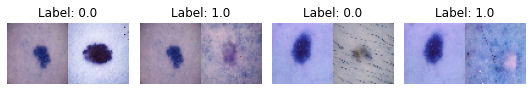

In [ ]:
visualize(pairs_train[:40], labels_train[:40], to_show=4, num_col=4)

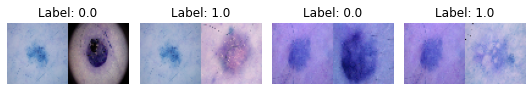

In [ ]:
visualize(pairs_val[:-1], labels_val[:-1], to_show=4, num_col=4)

In [ ]:
del train_x,train_y,val_x,val_y

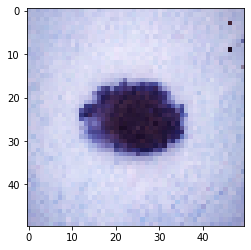

In [ ]:
for i in pairs_train:
  t=i[1]
  t=np.array(t)*255
  t=t.astype(np.uint8)
    
  plt.imshow(t)
  plt.show()
  break

In [ ]:
from tensorflow.keras import layers
from keras.applications.vgg16 import VGG16
# Provided two tensors t1 and t2
# Euclidean distance = sqrt(sum(square(t1-t2)))
def euclidean_distance(vects):
 

    x, y = vects
    sum_square = tf.math.reduce_sum(tf.math.square(x - y), axis=1, keepdims=True)
    return tf.math.sqrt(tf.math.maximum(sum_square, tf.keras.backend.epsilon()))


input = layers.Input((50, 50, 3))
x = tf.keras.layers.BatchNormalization()(input)
x = layers.Conv2D(32, (3, 3), activation="relu",padding='same')(x)
x = tf.keras.layers.BatchNormalization()(x)
x = layers.MaxPooling2D(pool_size=(2, 2),padding='same')(x)
x = layers.Conv2D(64, (3, 3), activation="relu",padding='same')(x)
x = tf.keras.layers.BatchNormalization()(x)
x = layers.MaxPooling2D(pool_size=(2, 2),padding='same')(x)
x = layers.Conv2D(128, (3, 3), activation="relu",padding='same')(x)
x = tf.keras.layers.BatchNormalization()(x)
x = layers.MaxPooling2D(pool_size=(2, 2),padding='same')(x)
x = layers.Conv2D(256, (3, 3), activation="relu",padding='same')(x)

x = layers.Flatten()(x)

x = tf.keras.layers.BatchNormalization()(x)

x = layers.Dense(256, activation="relu")(x)
embedding_network = keras.Model(input, x)


input_1 = layers.Input((50, 50, 3))
input_2 = layers.Input((50, 50, 3))

# As mentioned above, Siamese Network share weights between
# tower networks (sister networks). To allow this, we will use
# same embedding network for both tower networks.
tower_1 = embedding_network(input_1)
tower_2 = embedding_network(input_2)

merge_layer = layers.Lambda(euclidean_distance)([tower_1, tower_2])
normal_layer = tf.keras.layers.BatchNormalization()(merge_layer)
output_layer = layers.Dense(1, activation="sigmoid")(normal_layer)
siamese = keras.Model(inputs=[input_1, input_2], outputs=output_layer)


In [ ]:
margin=2
def loss(margin=2):
  

    # Contrastive loss = mean( (1-true_value) * square(prediction) +
    #                         true_value * square( max(margin-prediction, 0) ))
    def contrastive_loss(y_true, y_pred):

        square_pred = tf.math.square(y_pred)
        margin_square = tf.math.square(tf.math.maximum(margin - (y_pred), 0))
        return tf.math.reduce_mean(
            (1 - y_true) * square_pred + (y_true) * margin_square
        )

    return contrastive_loss


In [ ]:
siamese.compile(loss=loss(margin=margin), optimizer="adam", metrics=["accuracy"])
siamese.summary()


Model: "model_11"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_17 (InputLayer)          [(None, 50, 50, 3)]  0           []                               
                                                                                                  
 input_18 (InputLayer)          [(None, 50, 50, 3)]  0           []                               
                                                                                                  
 model_10 (Functional)          (None, 256)          3651020     ['input_17[0][0]',               
                                                                  'input_18[0][0]']               
                                                                                                  
 lambda_5 (Lambda)              (None, 1)            0           ['model_10[0][0]',        

In [ ]:
epochs=200
history = siamese.fit(
    [x_train_1, x_train_2],
    labels_train,
    validation_data=([x_val_1, x_val_2], labels_val),
    batch_size=batch_size,
    epochs=epochs
)

Epoch 1/200
484/484 [==============================] - 30s 18ms/step - loss: 1.1295 - accuracy: 0.6135 - val_loss: 0.9743 - val_accuracy: 0.6758
Epoch 2/200
484/484 [==============================] - 7s 15ms/step - loss: 0.9625 - accuracy: 0.6433 - val_loss: 0.8935 - val_accuracy: 0.6767
Epoch 3/200
484/484 [==============================] - 7s 15ms/step - loss: 0.8965 - accuracy: 0.6486 - val_loss: 0.9057 - val_accuracy: 0.5719
Epoch 4/200
484/484 [==============================] - 7s 14ms/step - loss: 0.8636 - accuracy: 0.6614 - val_loss: 0.8539 - val_accuracy: 0.6670
Epoch 5/200
484/484 [==============================] - 8s 16ms/step - loss: 0.8441 - accuracy: 0.6792 - val_loss: 0.8624 - val_accuracy: 0.6799
Epoch 6/200
484/484 [==============================] - 7s 14ms/step - loss: 0.8271 - accuracy: 0.6936 - val_loss: 0.8593 - val_accuracy: 0.6615
Epoch 7/200
484/484 [==============================] - 8s 16ms/step - loss: 0.8085 - accuracy: 0.7130 - val_loss: 0.8619 - val_accuracy

In [ ]:
from keras.models import load_model
siamese.save('/content/drive/MyDrive/RESEARCH CANCER/main_model6.h5')

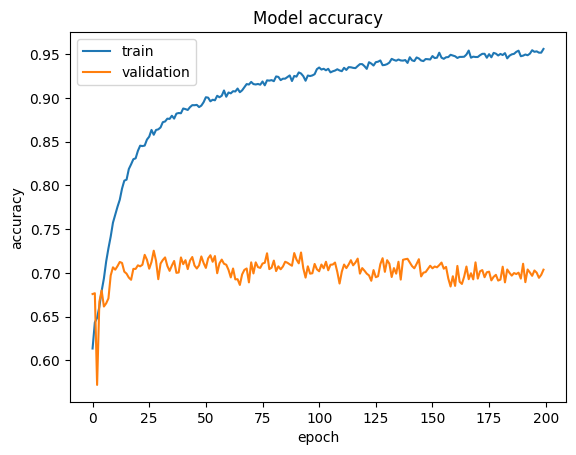

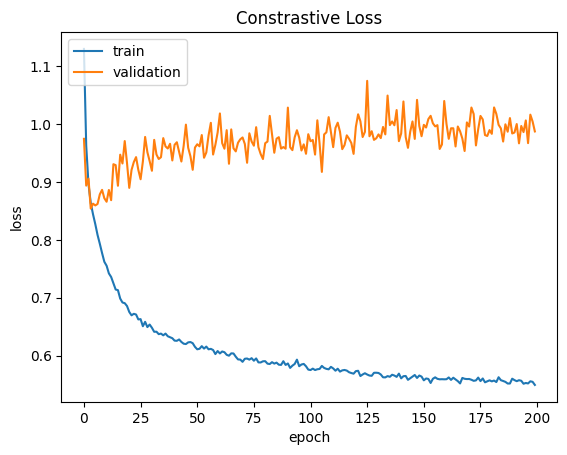

In [ ]:

def plt_metric(history, metric, title, has_valid=True):
    """Plots the given 'metric' from 'history'.

    Arguments:
        history: history attribute of History object returned from Model.fit.
        metric: Metric to plot, a string value present as key in 'history'.
        title: A string to be used as title of plot.
        has_valid: Boolean, true if valid data was passed to Model.fit else false.

    Returns:
        None.
    """
    plt.plot(history[metric])
    if has_valid:
        plt.plot(history["val_" + metric])
        plt.legend(["train", "validation"], loc="upper left")
    plt.title(title)
    plt.ylabel(metric)
    plt.xlabel("epoch")
    plt.show()


# Plot the accuracy
plt_metric(history=siamese.history.history, metric="accuracy", title="Model accuracy")

# Plot the constrastive loss
plt_metric(history=siamese.history.history, metric="loss", title="Constrastive Loss")

In [ ]:
from keras.models import load_model
siamese=load_model('/content/drive/MyDrive/RESEARCH CANCER/main_model6.h5',compile=False)
siamese.compile(loss=loss(margin=margin), optimizer="adam", metrics=["accuracy"])

In [ ]:
results = siamese.evaluate([x_test_1, x_test_2], labels_test)
print("test loss, test acc:", results)

73/73 [==============================] - 2s 9ms/step - loss: 1.0363 - accuracy: 0.6804
test loss, test acc: [1.036281943321228, 0.6803989410400391]


139/139 [==============================] - 1s 6ms/step


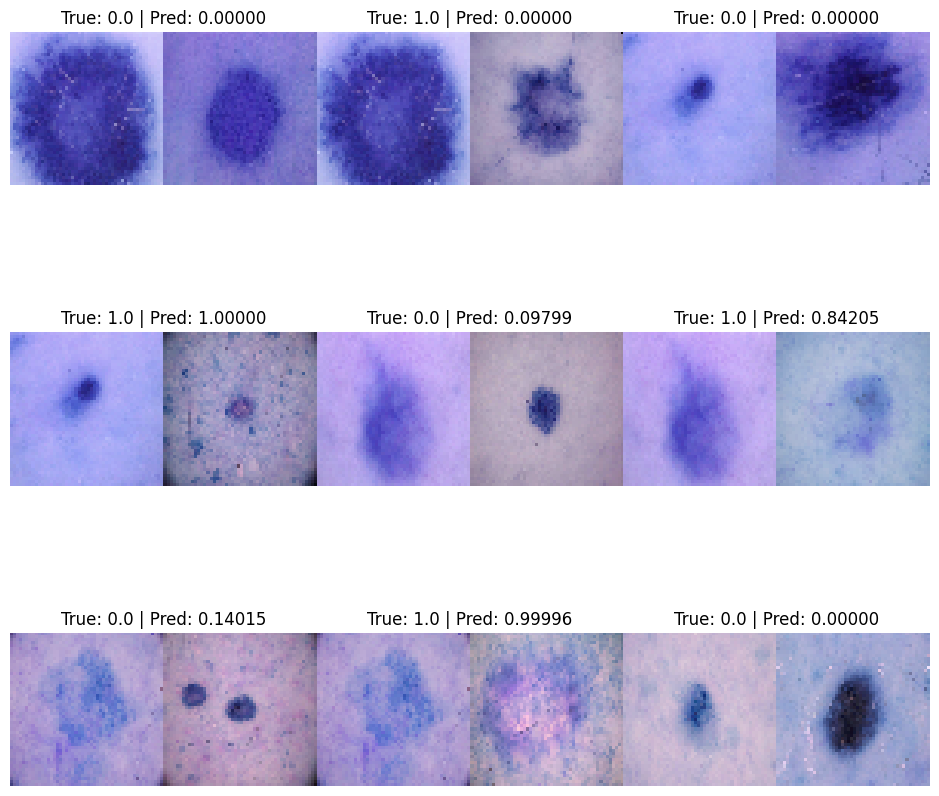

In [ ]:
predictions = siamese.predict([x_val_1, x_val_2])
visualize(pairs_val, labels_val, to_show=10, predictions=predictions, test=True)

In [ ]:
for i in range(len(predictions)):
  if predictions[i]<=0.8:
    predictions[i]=0
  else:
    predictions[i]=1

Validation dataset

In [ ]:
from sklearn import metrics
print(metrics.classification_report(predictions, labels_val))

              precision    recall  f1-score   support

         0.0       0.67      0.73      0.70      2000
         1.0       0.76      0.69      0.73      2420

    accuracy                           0.71      4420
   macro avg       0.71      0.71      0.71      4420
weighted avg       0.72      0.71      0.71      4420



In [ ]:
predictions = siamese.predict([x_test_1, x_test_2])

73/73 [==============================] - 0s 5ms/step


In [ ]:
for i in range(len(predictions)):
  if predictions[i]<=0.8:
    predictions[i]=0
  else:
    predictions[i]=1

Test dataset

In [ ]:
from sklearn import metrics
print(metrics.classification_report(predictions, labels_test))

              precision    recall  f1-score   support

         0.0       0.65      0.70      0.68      1064
         1.0       0.73      0.68      0.70      1242

    accuracy                           0.69      2306
   macro avg       0.69      0.69      0.69      2306
weighted avg       0.69      0.69      0.69      2306



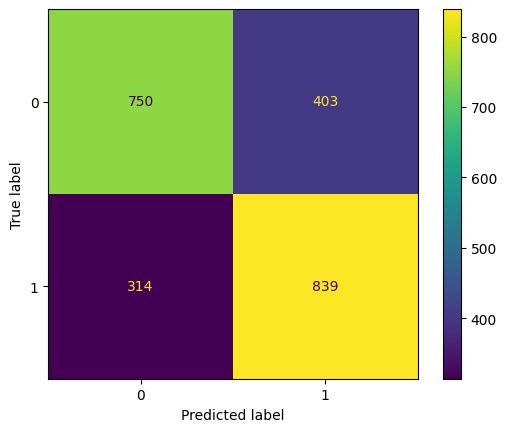

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn import metrics
conf_mat = confusion_matrix(labels_test, predictions)

# Print the confusion matrix
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = conf_mat, display_labels = ['0','1'])

cm_display.plot()
plt.show()

In [ ]:
del x_test_1,x_test_2,x_train_1,x_train_2,x_val_1,x_val_2

In [ ]:
del siamese

3RD APPROACH USING CLASS WEIGHT

In [ ]:
traning_data=[]
test_data=[]
val_data=[]
img_size=50
def create_traning_data():
  for category in CATEGORIES:
    path=os.path.join(DATADIR,category)
    class_num=CATEGORIES.index(category)
    for img in os.listdir(path):
      try:
        img_arr=cv2.imread(os.path.join(path,img))
        
        new_arr=cv2.resize(img_arr,(img_size,img_size))
        new_arr=(new_arr/255.0).astype(np.float16)
        traning_data.append([new_arr,class_num])
      except Exception as e:
        pass
def create_val_data():
  for category in CATEGORIES:
    path=os.path.join(DATADIR1,category)
    class_num=CATEGORIES.index(category)
    for img in os.listdir(path):
      try:
        img_arr=cv2.imread(os.path.join(path,img))
        
        new_arr=cv2.resize(img_arr,(img_size,img_size))
        new_arr=(new_arr/255.0).astype(np.float16)
        val_data.append([new_arr,class_num])
      except Exception as e:
        pass
test_dir='/content/content/MERGED_DATA/test'
def create_test_data():
  for category in CATEGORIES:
    path=os.path.join(test_dir,category)
    class_num=CATEGORIES.index(category)
    for img in os.listdir(path):
      try:
        img_arr=cv2.imread(os.path.join(path,img))
        
        new_arr=cv2.resize(img_arr,(img_size,img_size))
        new_arr=(new_arr/255.0).astype(np.float16)
        test_data.append([new_arr,class_num])
      except Exception as e:
        pass
create_val_data()
create_traning_data()
create_test_data()


In [ ]:
print(len(traning_data))
print(len(test_data))
print(len(val_data))

7742
1153
2210


In [ ]:
train_x=[]
train_y=[]
for features,label in traning_data:
  train_x.append(features)
  train_y.append(label)


val_x=[]
val_y=[]
for features,label in val_data:
  val_x.append(features)
  val_y.append(label)

test_x=[]
test_y=[]
for features,label in test_data:
  test_x.append(features)
  test_y.append(label)


In [ ]:
del traning_data
del val_data
del test_data

In [ ]:
train_x=np.array(train_x).reshape(-1,img_size,img_size,3)

val_x=np.array(val_x).reshape(-1,img_size,img_size,3)
test_x=np.array(test_x).reshape(-1,img_size,img_size,3)


In [ ]:
train_y=np.array(train_y)

val_y=np.array(val_y)
test_y=np.array(test_y)


In [ ]:
epochs = 200
batch_size = 32


In [ ]:

def visualize(pairs, labels, to_show=6, num_col=3, predictions=None, test=False):
   

    
    num_row = to_show // num_col if to_show // num_col != 0 else 1

   
    to_show = num_row * num_col

    # Plot the images
    fig, axes = plt.subplots(num_row, num_col, figsize=(5, 5))
    
    for i in range(to_show):

        # If the number of rows is 1, the axes array is one-dimensional
        if num_row == 1:
            ax = axes[i % num_col]
        else:
            ax = axes[i // num_col, i % num_col]
        im1=np.array(pairs[i][0])*255
        im1=im1.astype(np.uint8)
        im2=np.array(pairs[i][1])*255
        im2=im2.astype(np.uint8)

        ax.imshow(tf.concat([im1, im2], axis=1), cmap="gray")
        ax.set_axis_off()
        if test:
            ax.set_title("True: {} | Pred: {:.5f}".format(labels[i], predictions[i][0]))
        else:
            ax.set_title("Label: {}".format(labels[i]))
    if test:
        plt.tight_layout(rect=(0, 0, 1.9, 1.9), w_pad=0.0)
    else:
        plt.tight_layout(rect=(0, 0, 1.5, 1.5))
    plt.show()
    

In [ ]:
from sklearn.utils import compute_class_weight
class_weights = compute_class_weight(
                                        class_weight = "balanced",
                                        classes = np.unique(train_y),
                                        y = train_y                                                    
                                    )
class_weights = dict(zip(np.unique(train_y), class_weights))
alpha=[]
for i in class_weights:
  alpha.append(class_weights[i])

class_weights

{0: 0.17402836783779532,
 1: 2.396162178891984,
 2: 3.7729044834307994,
 3: 10.752777777777778,
 4: 6.827160493827161,
 5: 0.792831541218638,
 6: 8.689113355780023,
 7: 16.230607966457022,
 8: 1.1186244762317583}

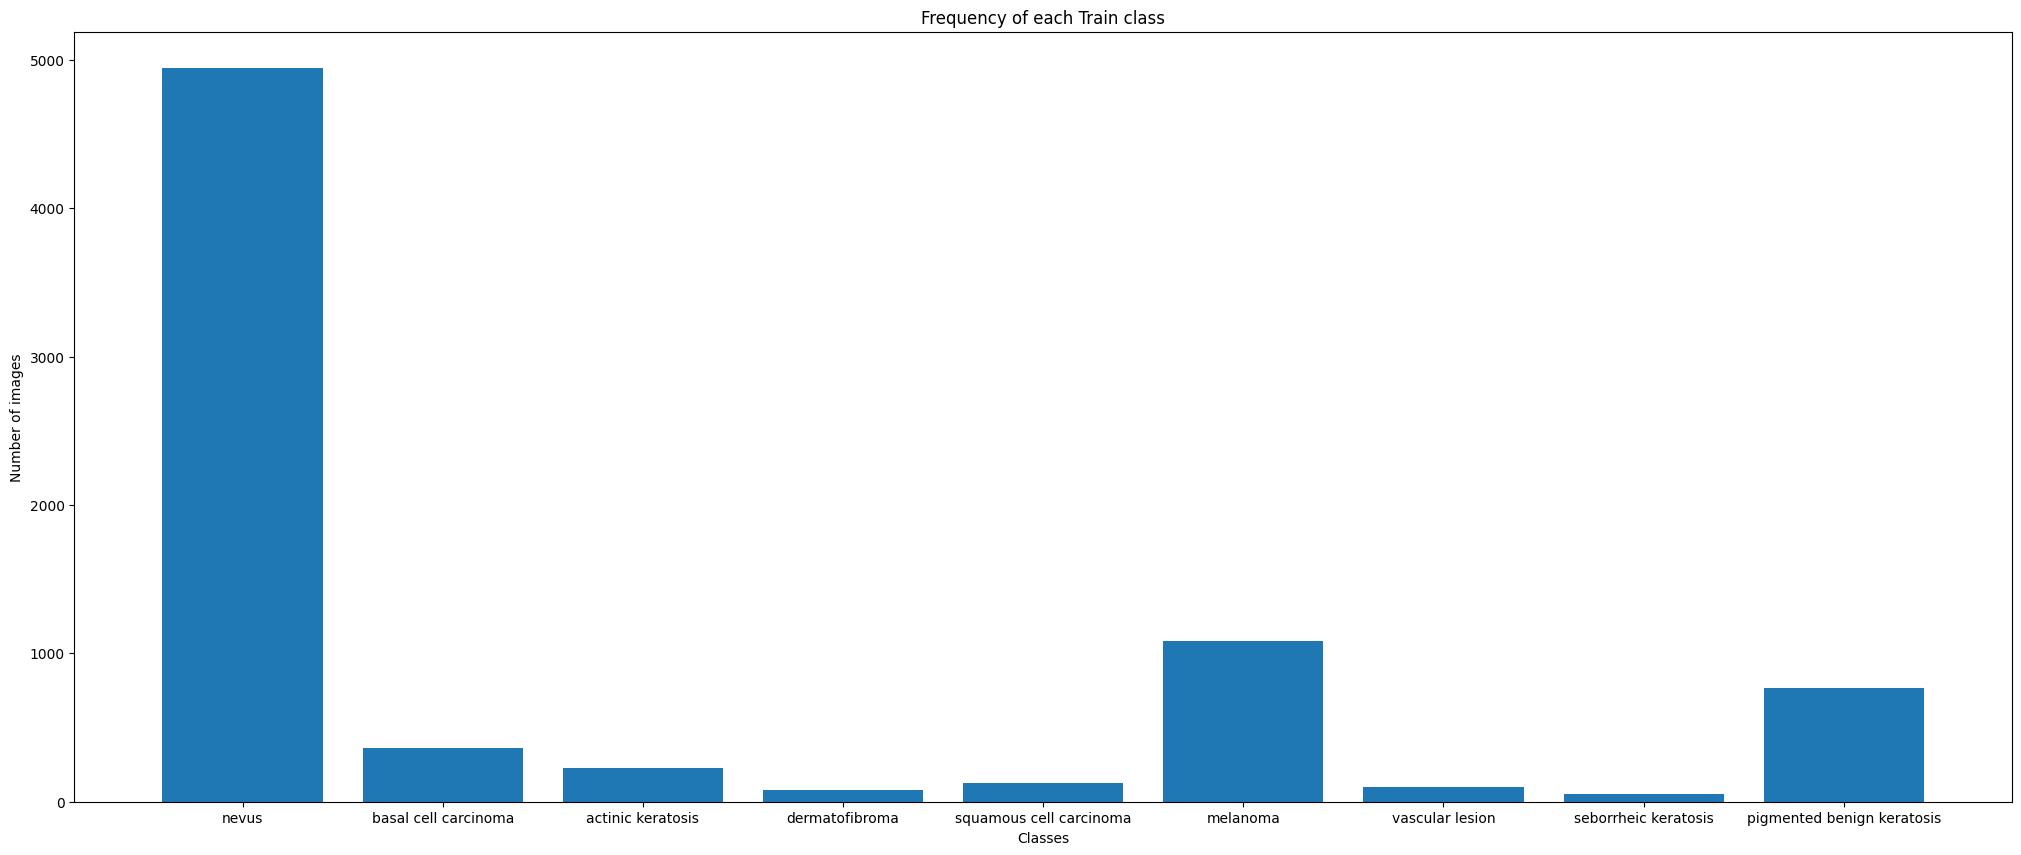

In [ ]:
from collections import Counter
counter = Counter(train_y)   
x=temp_1
y=[]  
plt.figure(figsize=(25, 10))                     
for i in counter:
    y.append(counter[i])
plt.title("Frequency of each Train class")
plt.xlabel("Classes")
plt.ylabel("Number of images")

plt.bar(x,y)
plt.show()

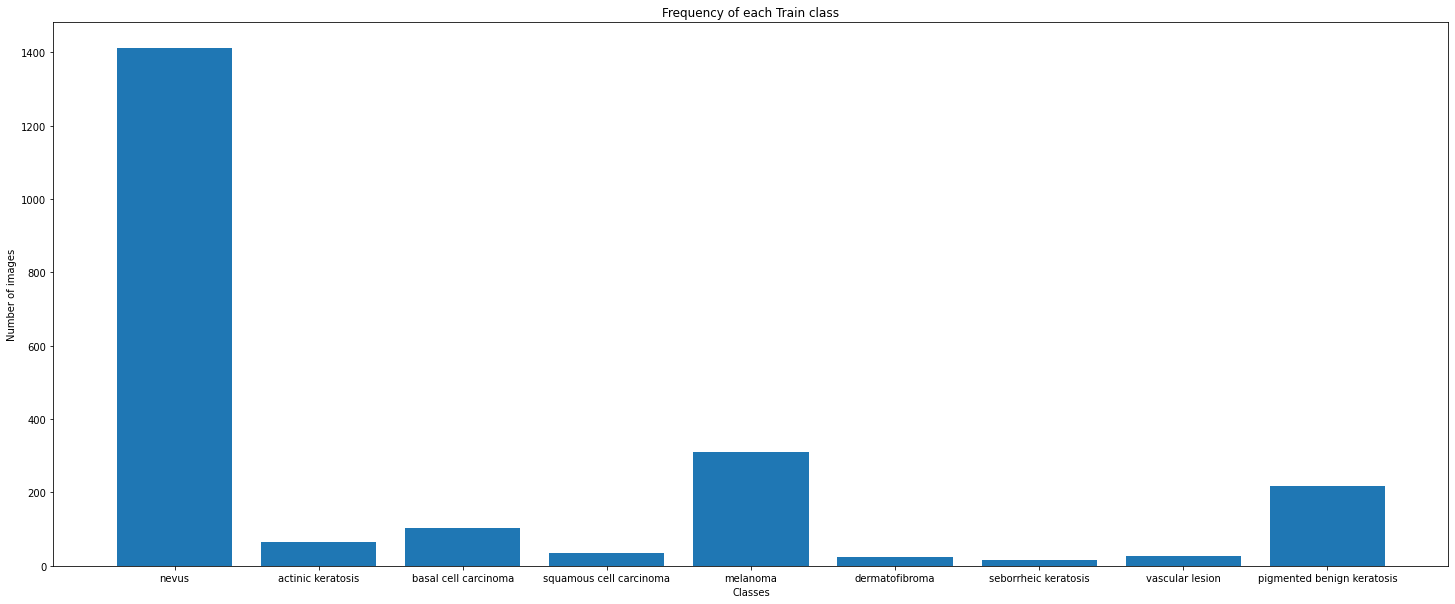

In [ ]:
from collections import Counter
counter = Counter(val_y)   
x=temp_1
plt.figure(figsize=(25, 10)) 
y=[]                       
for i in counter:
    y.append(counter[i])
plt.title("Frequency of each Train class")
plt.xlabel("Classes")
plt.ylabel("Number of images")

plt.bar(x,y)
plt.show()

In [ ]:
from keras.models import Sequential
from keras.layers import LeakyReLU
from keras.layers import Conv2D, MaxPooling2D, Activation, Dense, Flatten
model = Sequential()
model.add(Conv2D(4, (5, 5), input_shape=(50, 50, 3)))
model.add(LeakyReLU(alpha=0.05))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))

model.add(layers.Conv2D(8, (3, 3)))
model.add(LeakyReLU(alpha=0.05))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))

model.add(layers.Conv2D(16, (3, 3)))
model.add(LeakyReLU(alpha=0.05))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))

model.add(layers.Conv2D(32, (3, 3)))
model.add(LeakyReLU(alpha=0.05))
model.add(layers.MaxPooling2D(pool_size=(2, 2))


model.add(layers.Flatten())

model.add(tf.keras.layers.BatchNormalization())
model.add(layers.Dense(32))
model.add(LeakyReLU(alpha=0.05))
model.add(layers.Dense(16))
model.add(LeakyReLU(alpha=0.05))
model.add(layers.Dense(9, activation="softmax"))
#x = layers.Dense(9, activation="relu")(x)

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_24 (Conv2D)          (None, 46, 46, 4)         304       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 46, 46, 4)         0         
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 23, 23, 4)        0         
 g2D)                                                            
                                                                 
 conv2d_25 (Conv2D)          (None, 21, 21, 8)         296       
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 21, 21, 8)         0         
                                                                 
 max_pooling2d_19 (MaxPoolin  (None, 10, 10, 8)        0         
 g2D)                                                   

In [ ]:
from keras import optimizers
model.compile(loss='sparse_categorical_crossentropy' ,metrics=["accuracy"], optimizer='adam')

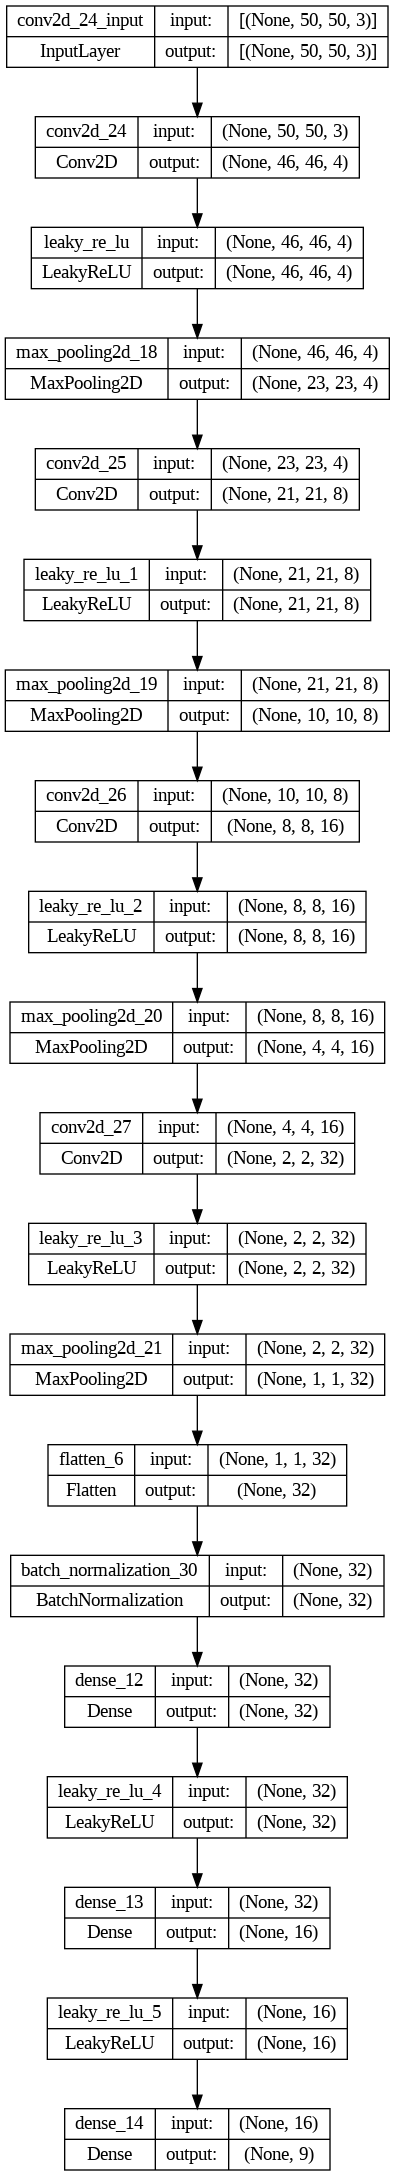

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model, '3rd.png', show_shapes=True)

In [ ]:
hist=model.fit(train_x,train_y,epochs=200,batch_size=32, validation_data = (val_x,val_y),class_weight=class_weights)

Epoch 1/200
242/242 [==============================] - 14s 18ms/step - loss: 2.0839 - accuracy: 0.0907 - val_loss: 2.2371 - val_accuracy: 0.0860
Epoch 2/200
242/242 [==============================] - 2s 9ms/step - loss: 1.8927 - accuracy: 0.2760 - val_loss: 1.6273 - val_accuracy: 0.4814
Epoch 3/200
242/242 [==============================] - 3s 13ms/step - loss: 1.7225 - accuracy: 0.3825 - val_loss: 1.7698 - val_accuracy: 0.4113
Epoch 4/200
242/242 [==============================] - 3s 12ms/step - loss: 1.6606 - accuracy: 0.4140 - val_loss: 2.0406 - val_accuracy: 0.1661
Epoch 5/200
242/242 [==============================] - 3s 10ms/step - loss: 1.5655 - accuracy: 0.4392 - val_loss: 1.4684 - val_accuracy: 0.4299
Epoch 6/200
242/242 [==============================] - 2s 9ms/step - loss: 1.5883 - accuracy: 0.4133 - val_loss: 3.5771 - val_accuracy: 0.0656
Epoch 7/200
242/242 [==============================] - 2s 7ms/step - loss: 1.5466 - accuracy: 0.4341 - val_loss: 1.5854 - val_accuracy: 0

In [ ]:
from keras.models import load_model
model.save('/content/drive/MyDrive/RESEARCH CANCER/main_model7.h5')

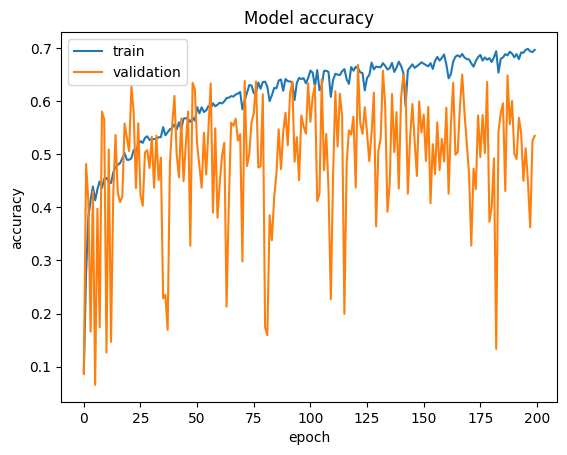

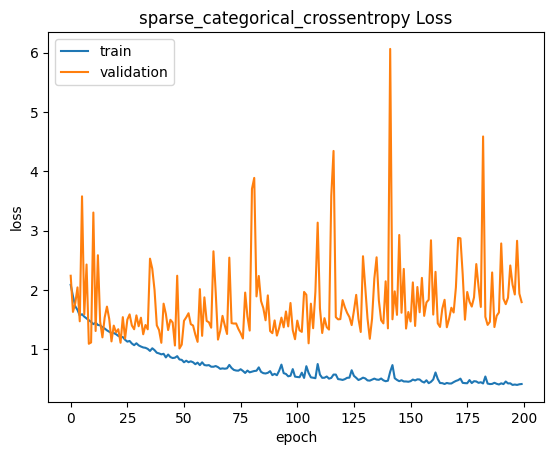

In [ ]:

def plt_metric(history, metric, title, has_valid=True):
    """Plots the given 'metric' from 'history'.

    Arguments:
        history: history attribute of History object returned from Model.fit.
        metric: Metric to plot, a string value present as key in 'history'.
        title: A string to be used as title of plot.
        has_valid: Boolean, true if valid data was passed to Model.fit else false.

    Returns:
        None.
    """
    plt.plot(history[metric])
    if has_valid:
        plt.plot(history["val_" + metric])
        plt.legend(["train", "validation"], loc="upper left")
    plt.title(title)
    plt.ylabel(metric)
    plt.xlabel("epoch")
    plt.show()


# Plot the accuracy
plt_metric(history=model.history.history, metric="accuracy", title="Model accuracy")

# Plot the constrastive loss
plt_metric(history=model.history.history, metric="loss", title="sparse_categorical_crossentropy Loss")

Test dataset

In [ ]:
results = model.evaluate(test_x, test_y)
print("test loss, test acc:", results)

37/37 [==============================] - 0s 7ms/step - loss: 1.9682 - accuracy: 0.5178
test loss, test acc: [1.9681575298309326, 0.5177797079086304]


In [ ]:
y_pred=model.predict(test_x)

37/37 [==============================] - 0s 2ms/step


In [ ]:
from sklearn.metrics import classification_report
y_true=test_y
y_pred = tf.argmax(y_pred, axis=1)



In [ ]:
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.54      0.69       723
           1       0.32      0.72      0.44        58
           2       0.26      0.10      0.14        50
           3       0.08      0.17      0.11        12
           4       0.00      0.00      0.00        19
           5       0.28      0.62      0.38       156
           6       0.62      0.53      0.57        15
           7       0.00      0.00      0.00         9
           8       0.28      0.46      0.35       111

    accuracy                           0.52      1153
   macro avg       0.31      0.35      0.30      1153
weighted avg       0.69      0.52      0.55      1153



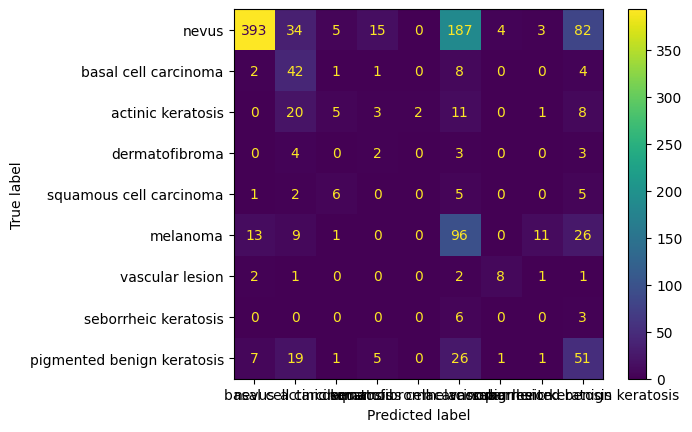

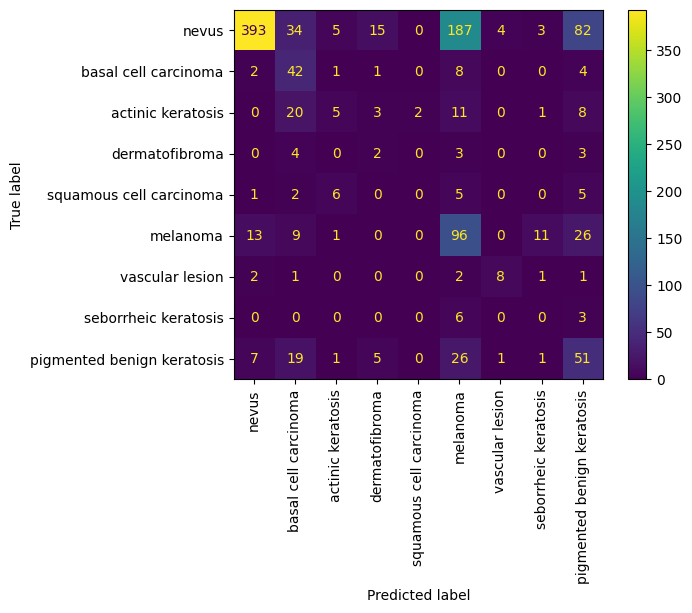

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn import metrics
conf_mat = confusion_matrix(y_true, y_pred)

# Print the confusion matrix
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = conf_mat, display_labels = CATEGORIES)

cm_display.plot()
cm_display.plot(xticks_rotation='vertical')
plt.show()

In [ ]:
CATEGORIES

['nevus',
 'basal cell carcinoma',
 'actinic keratosis',
 'dermatofibroma',
 'squamous cell carcinoma',
 'melanoma',
 'vascular lesion',
 'seborrheic keratosis',
 'pigmented benign keratosis']

# Model using class weight, focal loss , learning rate scheduler


In [ ]:
traning_data=[]
test_data=[]
val_data=[]
img_size=50
def create_traning_data():
  for category in CATEGORIES:
    path=os.path.join(DATADIR,category)
    class_num=CATEGORIES.index(category)
    for img in os.listdir(path):
      try:
        img_arr=cv2.imread(os.path.join(path,img))
        
        new_arr=cv2.resize(img_arr,(img_size,img_size))
        new_arr=(new_arr/255.0).astype(np.float16)
        traning_data.append([new_arr,class_num])
      except Exception as e:
        pass
def create_val_data():
  for category in CATEGORIES:
    path=os.path.join(DATADIR1,category)
    class_num=CATEGORIES.index(category)
    for img in os.listdir(path):
      try:
        img_arr=cv2.imread(os.path.join(path,img))
        
        new_arr=cv2.resize(img_arr,(img_size,img_size))
        new_arr=(new_arr/255.0).astype(np.float16)
        val_data.append([new_arr,class_num])
      except Exception as e:
        pass
test_dir='/content/content/MERGED_DATA/test'
def create_test_data():
  for category in CATEGORIES:
    path=os.path.join(test_dir,category)
    class_num=CATEGORIES.index(category)
    for img in os.listdir(path):
      try:
        img_arr=cv2.imread(os.path.join(path,img))
        
        new_arr=cv2.resize(img_arr,(img_size,img_size))
        new_arr=(new_arr/255.0).astype(np.float16)
        test_data.append([new_arr,class_num])
      except Exception as e:
        pass
create_val_data()
create_traning_data()
create_test_data()


In [ ]:
print(len(traning_data))
print(len(test_data))
print(len(val_data))

7742
1153
2210


In [ ]:
train_x=[]
train_y=[]
for features,label in traning_data:
  train_x.append(features)
  train_y.append(label)


val_x=[]
val_y=[]
for features,label in val_data:
  val_x.append(features)
  val_y.append(label)

test_x=[]
test_y=[]
for features,label in test_data:
  test_x.append(features)
  test_y.append(label)


In [ ]:
del traning_data
del val_data
del test_data

In [ ]:
train_x=np.array(train_x).reshape(-1,img_size,img_size,3)

val_x=np.array(val_x).reshape(-1,img_size,img_size,3)
test_x=np.array(test_x).reshape(-1,img_size,img_size,3)


In [ ]:
train_y=np.array(train_y)

val_y=np.array(val_y)
test_y=np.array(test_y)


In [ ]:
epochs = 200
batch_size = 32


In [ ]:

def visualize(pairs, labels, to_show=6, num_col=3, predictions=None, test=False):
   

    
    num_row = to_show // num_col if to_show // num_col != 0 else 1

   
    to_show = num_row * num_col

    # Plot the images
    fig, axes = plt.subplots(num_row, num_col, figsize=(5, 5))
    
    for i in range(to_show):

        # If the number of rows is 1, the axes array is one-dimensional
        if num_row == 1:
            ax = axes[i % num_col]
        else:
            ax = axes[i // num_col, i % num_col]
        im1=np.array(pairs[i][0])*255
        im1=im1.astype(np.uint8)
        im2=np.array(pairs[i][1])*255
        im2=im2.astype(np.uint8)

        ax.imshow(tf.concat([im1, im2], axis=1), cmap="gray")
        ax.set_axis_off()
        if test:
            ax.set_title("True: {} | Pred: {:.5f}".format(labels[i], predictions[i][0]))
        else:
            ax.set_title("Label: {}".format(labels[i]))
    if test:
        plt.tight_layout(rect=(0, 0, 1.9, 1.9), w_pad=0.0)
    else:
        plt.tight_layout(rect=(0, 0, 1.5, 1.5))
    plt.show()
    

Rewieghting

In [ ]:
from sklearn.utils import compute_class_weight
class_weights = compute_class_weight(
                                        class_weight = "balanced",
                                        classes = np.unique(train_y),
                                        y = train_y                                                    
                                    )
class_weights = dict(zip(np.unique(train_y), class_weights))
alpha=[]
for i in class_weights:
  alpha.append(class_weights[i])

class_weights

{0: 0.17402836783779532,
 1: 2.396162178891984,
 2: 3.7729044834307994,
 3: 10.752777777777778,
 4: 6.827160493827161,
 5: 0.792831541218638,
 6: 8.689113355780023,
 7: 16.230607966457022,
 8: 1.1186244762317583}

In [ ]:
class LossLearningRateScheduler(tf.keras.callbacks.History):
    """
    base_lr: the starting learning rate
    lookback_epochs: the number of epochs in the past to compare with the loss function at the current epoch to determine if progress is being made.
    decay_threshold / decay_multiple: if loss function has not improved by a factor of decay_threshold * lookback_epochs, then decay_multiple will be applied to the learning rate.
    spike_epochs: list of the epoch numbers where you want to spike the learning rate.
    spike_multiple: the multiple applied to the current learning rate for a spike.
    """

    def __init__(self, base_lr, lookback_epochs, spike_epochs = None, spike_multiple = 10, decay_threshold = 0.002, decay_multiple = 0.7, loss_type = 'val_loss'):


        super(LossLearningRateScheduler, self).__init__()
        self.base_lr = base_lr
        self.lookback_epochs = lookback_epochs
        self.spike_epochs = spike_epochs
        self.spike_multiple = spike_multiple
        self.decay_threshold = decay_threshold
        self.decay_multiple = decay_multiple
        self.loss_type = loss_type


    def on_epoch_begin(self, epoch, logs=None):


        if len(self.epoch) > self.lookback_epochs:


            current_lr = tf.keras.backend.get_value(self.model.optimizer.lr)


            target_loss = self.history[self.loss_type] 


            loss_diff =  target_loss[-int(self.lookback_epochs)] - target_loss[-1]


            if loss_diff <= np.abs(target_loss[-1]) * (self.decay_threshold * self.lookback_epochs):


                print(' '.join(('Changing learning rate from', str(current_lr), 'to', str(current_lr * self.decay_multiple))))
                tf.keras.backend.set_value(self.model.optimizer.lr, current_lr * self.decay_multiple)
                current_lr = current_lr * self.decay_multiple


            else:


                print(' '.join(('Learning rate:', str(current_lr))))


            if self.spike_epochs is not None and len(self.epoch) in self.spike_epochs:
                print(' '.join(('Spiking learning rate from', str(current_lr), 'to', str(current_lr * self.spike_multiple))))
                tf.keras.backend.set_value(self.model.optimizer.lr, current_lr * self.spike_multiple)


        else:


            print(' '.join(('Setting learning rate to', str(self.base_lr))))
            tf.keras.backend.set_value(self.model.optimizer.lr, self.base_lr)

        return tf.keras.backend.get_value(self.model.optimizer.lr)



callback_lr = LossLearningRateScheduler(base_lr=0.001, lookback_epochs=3)

In [ ]:
!pip install tensorflow-addons

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 591.0/591.0 kB 30.4 MB/s eta 0:00:00


In [ ]:
!pip install focal-loss

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from keras.models import Sequential
from keras.layers import LeakyReLU
from keras.layers import Conv2D, MaxPooling2D, Activation, Dense, Flatten
import tensorflow as tf
from tensorflow.keras.models import Model, load_model, Sequential
from tensorflow.keras.layers import Input, Flatten, Dense, concatenate,  Dropout, Conv2D, BatchNormalization, MaxPool2D, Activation, Dense
from tensorflow.keras.optimizers import Adam, Nadam, Adadelta,SGD
from tensorflow.keras import regularizers

from tensorflow.keras.utils import plot_model
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow_addons as tfa
target_shape=(50,50)







In [ ]:
from keras.applications.vgg16 import VGG16
from keras.applications.vgg19 import VGG19

In [ ]:
vgg16 = VGG16()

553467096/553467096 [==============================] - 11s 0us/step


In [ ]:
model = Sequential()

model.add(VGG16(include_top=False, pooling='max', weights='imagenet',input_shape=(50,50,3)))
model.add(Flatten())
model.add(BatchNormalization())
model.add(Dense(2048, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(1024, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(9, activation='softmax'))

model.layers[0].trainable = False

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 512)               14714688  
                                                                 
 flatten_2 (Flatten)         (None, 512)               0         
                                                                 
 batch_normalization_6 (Batc  (None, 512)              2048      
 hNormalization)                                                 
                                                                 
 dense_6 (Dense)             (None, 2048)              1050624   
                                                                 
 batch_normalization_7 (Batc  (None, 2048)             8192      
 hNormalization)                                                 
                                                                 
 dense_7 (Dense)             (None, 1024)             

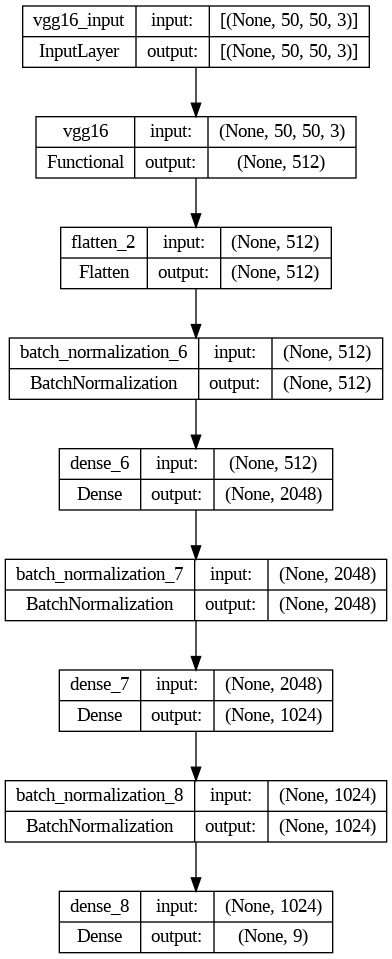

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model, '4th.png', show_shapes=True)

In [ ]:
from focal_loss import SparseCategoricalFocalLoss
model.compile(loss=SparseCategoricalFocalLoss(gamma=2) ,optimizer=tfa.optimizers.LazyAdam(0.001), metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 512)               14714688  
                                                                 
 flatten_2 (Flatten)         (None, 512)               0         
                                                                 
 batch_normalization_6 (Batc  (None, 512)              2048      
 hNormalization)                                                 
                                                                 
 dense_6 (Dense)             (None, 2048)              1050624   
                                                                 
 batch_normalization_7 (Batc  (None, 2048)             8192      
 hNormalization)                                                 
                                                                 
 dense_7 (Dense)             (None, 1024)             

In [ ]:
filepath = '/content/drive/MyDrive/model8_best.h5'
from tensorflow.keras.callbacks import Callback

checkpoint = ModelCheckpoint(filepath=filepath,
                             monitor='val_accuracy',
                             verbose=1,
                             save_best_only=True)



callbacks = [checkpoint,callback_lr]

In [ ]:

history=model.fit(train_x,train_y,epochs=200,batch_size=32, validation_data = (val_x,val_y),class_weight=class_weights,callbacks=callbacks)

Setting learning rate to 0.001
Epoch 1/200
241/242 [============================>.] - ETA: 0s - loss: 2.3506 - accuracy: 0.2849
Epoch 1: val_accuracy improved from -inf to 0.59548, saving model to /content/drive/MyDrive/model8_best.h5
242/242 [==============================] - 8s 27ms/step - loss: 2.3466 - accuracy: 0.2852 - val_loss: 0.8447 - val_accuracy: 0.5955
Setting learning rate to 0.001
Epoch 2/200
241/242 [============================>.] - ETA: 0s - loss: 1.2016 - accuracy: 0.3957
Epoch 2: val_accuracy did not improve from 0.59548
242/242 [==============================] - 5s 21ms/step - loss: 1.2008 - accuracy: 0.3959 - val_loss: 1.6296 - val_accuracy: 0.4281
Setting learning rate to 0.001
Epoch 3/200
239/242 [============================>.] - ETA: 0s - loss: 1.0077 - accuracy: 0.4351
Epoch 3: val_accuracy did not improve from 0.59548
242/242 [==============================] - 5s 20ms/step - loss: 1.0043 - accuracy: 0.4353 - val_loss: 1.4956 - val_accuracy: 0.3299
Setting lea

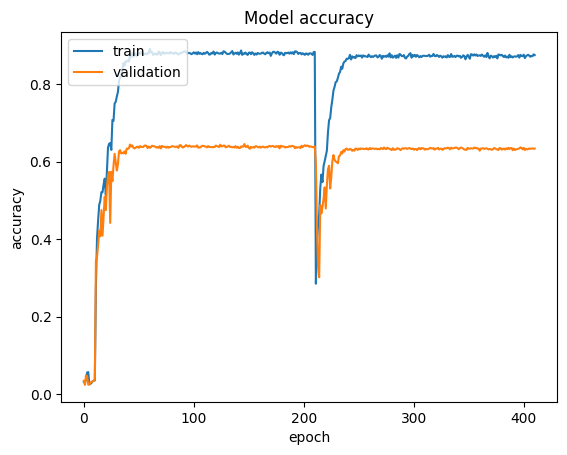

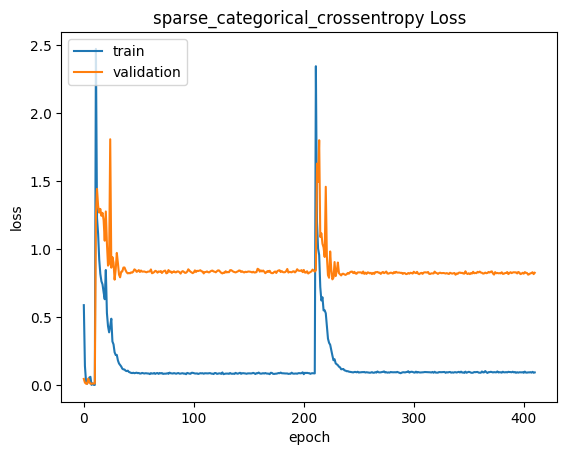

In [ ]:

def plt_metric(history, metric, title, has_valid=True):
    """Plots the given 'metric' from 'history'.

    Arguments:
        history: history attribute of History object returned from Model.fit.
        metric: Metric to plot, a string value present as key in 'history'.
        title: A string to be used as title of plot.
        has_valid: Boolean, true if valid data was passed to Model.fit else false.

    Returns:
        None.
    """
    plt.plot(history[metric])
    if has_valid:
        plt.plot(history["val_" + metric])
        plt.legend(["train", "validation"], loc="upper left")
    plt.title(title)
    plt.ylabel(metric)
    plt.xlabel("epoch")
    plt.show()


# Plot the accuracy
plt_metric(history=model.history.history, metric="accuracy", title="Model accuracy")

# Plot the constrastive loss
plt_metric(history=model.history.history, metric="loss", title="sparse_categorical_crossentropy Loss")

In [ ]:
model.history.history

{}

In [ ]:
print("\n Evaluate on test data")
results = model.evaluate(test_x, test_y, batch_size=128)
print("test loss, test acc:", results)


 Evaluate on test data
10/10 [==============================] - 0s 36ms/step - loss: 0.8231 - accuracy: 0.6245
test loss, test acc: [0.823082685470581, 0.6244579553604126]


Test dataset

In [ ]:
results = model.evaluate(test_x, test_y)
print("test loss, test acc:", results)

37/37 [==============================] - 1s 15ms/step - loss: 0.8231 - accuracy: 0.6245
test loss, test acc: [0.8230832815170288, 0.6244579553604126]


In [ ]:
y_pred=model.predict(test_x)

37/37 [==============================] - 1s 12ms/step


In [ ]:
from sklearn.metrics import classification_report
y_true=test_y
y_pred = tf.argmax(y_pred, axis=1)



In [ ]:
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.77      0.82       723
           1       0.35      0.48      0.41        58
           2       0.24      0.32      0.27        50
           3       0.20      0.33      0.25        12
           4       0.04      0.05      0.04        19
           5       0.43      0.38      0.41       156
           6       0.56      0.60      0.58        15
           7       0.05      0.11      0.07         9
           8       0.31      0.41      0.35       111

    accuracy                           0.62      1153
   macro avg       0.34      0.38      0.36      1153
weighted avg       0.67      0.62      0.65      1153



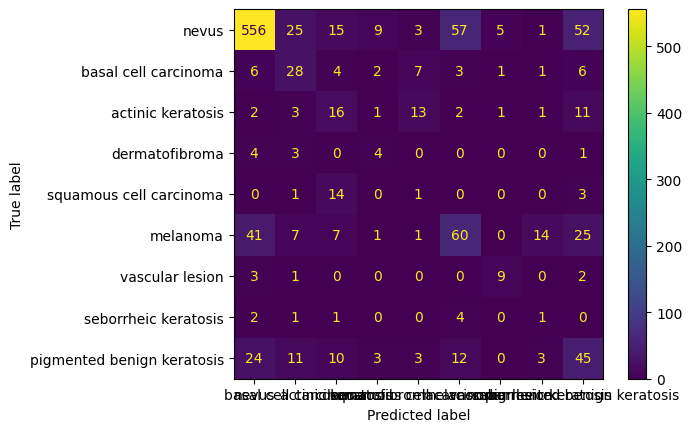

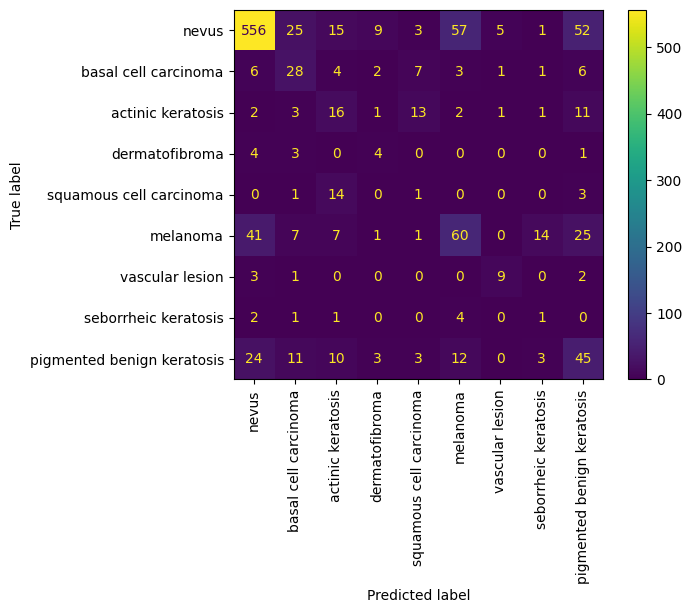

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn import metrics
conf_mat = confusion_matrix(y_true, y_pred)

# Print the confusion matrix
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = conf_mat, display_labels = CATEGORIES)

cm_display.plot()
cm_display.plot(xticks_rotation='vertical')
plt.show()

Simease backbone using vgg16

In [ ]:
traning_data=[]
val_data=[]
img_size=50
DATADIR='/content/content/MERGED_DATA/train'
DATADIR1='/content/content/MERGED_DATA/val'
def create_traning_data():
  for category in CATEGORIES:
    path=os.path.join(DATADIR,category)
    class_num=CATEGORIES.index(category)
    for img in os.listdir(path):
      try:
        img_arr=cv2.imread(os.path.join(path,img))
        
        new_arr=cv2.resize(img_arr,(img_size,img_size))
        #new_arr=(new_arr/255.0).astype(np.float16)
        traning_data.append([new_arr,class_num])
      except Exception as e:
        pass
def create_val_data():
  for category in CATEGORIES:
    path=os.path.join(DATADIR1,category)
    class_num=CATEGORIES.index(category)
    for img in os.listdir(path):
      try:
        img_arr=cv2.imread(os.path.join(path,img))
        
        new_arr=cv2.resize(img_arr,(img_size,img_size))
        #new_arr=(new_arr/255.0).astype(np.float16)
        traning_data.append([new_arr,class_num])
      except Exception as e:
        pass
pt='/content/content/MERGED_DATA/test'
def test_data():
  for category in CATEGORIES:
    path=os.path.join(pt,category)
    class_num=CATEGORIES.index(category)
    for img in os.listdir(path):
      try:
        img_arr=cv2.imread(os.path.join(path,img))
        
        new_arr=cv2.resize(img_arr,(img_size,img_size))
        #new_arr=(new_arr/255.0).astype(np.float16)
        val_data.append([new_arr,class_num])
      except Exception as e:
        pass

create_val_data()
create_traning_data()
test_data()



In [ ]:
print(len(traning_data))
print(len(val_data))

9952
1153


In [ ]:
train_x=[]
train_y=[]
for features,label in traning_data:
  train_x.append(features)
  train_y.append(label)


val_x=[]
val_y=[]
for features,label in val_data:
  val_x.append(features)
  val_y.append(label)


In [ ]:
del traning_data
del val_data

In [ ]:
train_x=np.array(train_x).reshape(-1,img_size,img_size,3)

val_x=np.array(val_x).reshape(-1,img_size,img_size,3)


In [ ]:
train_y=np.array(train_y)

val_y=np.array(val_y)


Zero centric pixels of train images channel wise

In [ ]:
train_x=train_x/255.
train_x.min(),train_x.max(),train_x.shape

(0.0, 1.0, (9952, 50, 50, 3))

In [ ]:
mean = train_x.mean(axis=(0,1,2))
std = train_x.std(axis=(0,1,2))
print(mean, std)

[0.57112974 0.55199715 0.76213726] [0.17126371 0.15432581 0.14180761]


In [ ]:
train_x[..., 0] -= mean[0]
train_x[..., 1] -= mean[1]
train_x[..., 2] -= mean[2]

In [ ]:
train_x.min(axis=(0,1,2)),train_x.max(axis=(0,1,2))

(array([-0.57112974, -0.55199715, -0.76213726]),
 array([0.42887026, 0.44800285, 0.23786274]))

In [ ]:
train_x[..., 0] /= std[0]
train_x[..., 1] /= std[1]
train_x[..., 2] /= std[2]

In [ ]:
train_x.min(axis=(0,1,2)),train_x.max(axis=(0,1,2))

(array([-3.33479725, -3.57682984, -5.37444543]),
 array([2.50415146, 2.90296781, 1.67736235]))

Zero centric pixel of validation images channel wise

In [ ]:
val_x=val_x/255.

In [ ]:
mean = val_x.mean(axis=(0,1,2))
std = val_x.std(axis=(0,1,2))
print(mean, std)

[0.56784891 0.54978698 0.75800892] [0.16802056 0.15056029 0.14051026]


In [ ]:
val_x[..., 0] -= mean[0]
val_x[..., 1] -= mean[1]
val_x[..., 2] -= mean[2]

In [ ]:
val_x.min(axis=(0,1,2)),val_x.max(axis=(0,1,2))

(array([-0.56784891, -0.54978698, -0.75800892]),
 array([0.43215109, 0.45021302, 0.24199108]))

In [ ]:
val_x[..., 0] /= std[0]
val_x[..., 1] /= std[1]
val_x[..., 2] /= std[2]

In [ ]:
val_x.min(axis=(0,1,2)),val_x.max(axis=(0,1,2))

(array([-3.37963942, -3.65160689, -5.39468722]),
 array([2.57201311, 2.99025077, 1.72223061]))

In [ ]:
mean = val_x.mean(axis=(0,1,2))
std = val_x.std(axis=(0,1,2))
print(mean, std)

[-5.78495815e-11 -6.26364947e-11 -1.45429679e-10] [1. 1. 1.]


In [ ]:
import random
def make_pairs(x, y):
    """Creates a tuple containing image pairs with corresponding label.

    Arguments:
        x: List containing images, each index in this list corresponds to one image.
        y: List containing labels, each label with datatype of `int`.

    Returns:
        Tuple containing two numpy arrays as (pairs_of_samples, labels),
        where pairs_of_samples' shape is (2len(x), 2,n_features_dims) and
        labels are a binary array of shape (2len(x)).
    """

    num_classes = max(y) + 1
    digit_indices = [np.where(y == i)[0] for i in range(num_classes)]

    pairs = []
    labels = []

    for idx1 in range(len(x)):
        # add a matching example
        x1 = x[idx1]
        label1 = y[idx1]
        idx2 = random.choice(digit_indices[label1])
        x2 = x[idx2]

        pairs += [[x1, x2]]
        labels += [0]

        # add a non-matching example
        label2 = random.randint(0, num_classes - 1)
        while label2 == label1:
            label2 = random.randint(0, num_classes - 1)

        idx2 = random.choice(digit_indices[label2])
        x2 = x[idx2]

        pairs += [[x1, x2]]
        labels += [1]

    return np.array(pairs), np.array(labels).astype("float32")


# make train pairs
pairs_train, labels_train = make_pairs(train_x, train_y)

# make validation pairs
pairs_val, labels_val = make_pairs(val_x, val_y)

# make test pairs


In [ ]:
epochs = 50
batch_size = 32
margin = 1  # Margin for constrastive loss.

In [ ]:
x_train_1 = pairs_train[:, 0]  # x_train_1.shape is (219340, 25, 25, 3)
x_train_2 = pairs_train[:, 1]
print(x_train_1.shape)
print(x_train_2.shape)

(19904, 50, 50, 3)
(19904, 50, 50, 3)


In [ ]:
x_val_1 = pairs_val[:, 0]  
x_val_2 = pairs_val[:, 1]
print(x_val_1.shape)
print(x_val_2.shape)

(2306, 50, 50, 3)
(2306, 50, 50, 3)


In [ ]:

def visualize(pairs, labels, to_show=6, num_col=3, predictions=None, test=False):
    """Creates a plot of pairs and labels, and prediction if it's test dataset.

    Arguments:
        pairs: Numpy Array, of pairs to visualize, having shape
               (Number of pairs, 2, 28, 28).
        to_show: Int, number of examples to visualize (default is 6)
                `to_show` must be an integral multiple of `num_col`.
                 Otherwise it will be trimmed if it is greater than num_col,
                 and incremented if if it is less then num_col.
        num_col: Int, number of images in one row - (default is 3)
                 For test and train respectively, it should not exceed 3 and 7.
        predictions: Numpy Array of predictions with shape (to_show, 1) -
                     (default is None)
                     Must be passed when test=True.
        test: Boolean telling whether the dataset being visualized is
              train dataset or test dataset - (default False).

    Returns:
        None.
    """

    # Define num_row
    # If to_show % num_col != 0
    #    trim to_show,
    #       to trim to_show limit num_row to the point where
    #       to_show % num_col == 0
    #
    # If to_show//num_col == 0
    #    then it means num_col is greater then to_show
    #    increment to_show
    #       to increment to_show set num_row to 1
    num_row = to_show // num_col if to_show // num_col != 0 else 1

    # `to_show` must be an integral multiple of `num_col`
    #  we found num_row and we have num_col
    #  to increment or decrement to_show
    #  to make it integral multiple of `num_col`
    #  simply set it equal to num_row * num_col
    to_show = num_row * num_col

    # Plot the images
    fig, axes = plt.subplots(num_row, num_col, figsize=(5, 5))
    
    for i in range(to_show):

        # If the number of rows is 1, the axes array is one-dimensional
        if num_row == 1:
            ax = axes[i % num_col]
        else:
            ax = axes[i // num_col, i % num_col]
        im1=np.array(pairs[i][0])*255
        im1=im1.astype(np.uint8)
        im2=np.array(pairs[i][1])*255
        im2=im2.astype(np.uint8)

        ax.imshow(tf.concat([im1, im2], axis=1), cmap="gray")
        ax.set_axis_off()
        if test:
            ax.set_title("True: {} | Pred: {:.5f}".format(labels[i], predictions[i][0]))
        else:
            ax.set_title("Label: {}".format(labels[i]))
    if test:
        plt.tight_layout(rect=(0, 0, 1.9, 1.9), w_pad=0.0)
    else:
        plt.tight_layout(rect=(0, 0, 1.5, 1.5))
    plt.show()
    

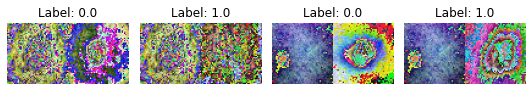

In [ ]:
visualize(pairs_train[:40], labels_train[:40], to_show=4, num_col=4)

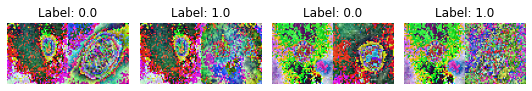

In [ ]:
visualize(pairs_val[:-1], labels_val[:-1], to_show=4, num_col=4)

In [ ]:
del train_x,train_y,val_x,val_y

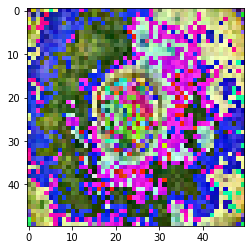

In [ ]:
for i in pairs_train:
  t=i[1]
  t=np.array(t)*255
  t=t.astype(np.uint8)
    
  plt.imshow(t)
  plt.show()
  break

In [ ]:
from keras.applications.vgg16 import VGG16
from keras.applications.vgg19 import VGG19

In [ ]:
model = Sequential()

model.add(VGG19(include_top=False, pooling='max', weights='imagenet',input_shape=(50,50,3)))
model.add(Flatten())
model.add(BatchNormalization())
model.add(Dense(2048, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(1024, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(100, activation='sigmoid'))

model.layers[0].trainable = False

80134624/80134624 [==============================] - 4s 0us/step


In [ ]:
from tensorflow.keras import layers
from keras.applications.vgg16 import VGG16
# Provided two tensors t1 and t2
# Euclidean distance = sqrt(sum(square(t1-t2)))
def euclidean_distance(vects):
    """Find the Euclidean distance between two vectors.

    Arguments:
        vects: List containing two tensors of same length.

    Returns:
        Tensor containing euclidean distance
        (as floating point value) between vectors.
    """

    x, y = vects
    sum_square = tf.math.reduce_sum(tf.math.square(x - y), axis=1, keepdims=True)
    return tf.math.sqrt(tf.math.maximum(sum_square, tf.keras.backend.epsilon()))


input = layers.Input((50, 50, 3))
vgg16 = VGG16()

x=VGG16(include_top=False, pooling='max', weights='imagenet',input_shape=(50,50,3))(input)




x = layers.Flatten()(x)

x = tf.keras.layers.BatchNormalization()(x)
x = layers.Dense(2048, activation="relu")(x)
x = layers.Dense(1024, activation="relu")(x)
#x = layers.Dense(9, activation="relu")(x)
embedding_network = keras.Model(input, x)


input_1 = layers.Input((50, 50, 3))
input_2 = layers.Input((50, 50, 3))

# As mentioned above, Siamese Network share weights between
# tower networks (sister networks). To allow this, we will use
# same embedding network for both tower networks.
tower_1 = embedding_network(input_1)
tower_2 = embedding_network(input_2)

merge_layer = layers.Lambda(euclidean_distance)([tower_1, tower_2])
normal_layer = tf.keras.layers.BatchNormalization()(merge_layer)
output_layer = layers.Dense(1, activation="sigmoid")(normal_layer)
siamese = keras.Model(inputs=[input_1, input_2], outputs=output_layer)


In [ ]:
margin=1
def loss(margin=1):
    """Provides 'constrastive_loss' an enclosing scope with variable 'margin'.

    Arguments:
        margin: Integer, defines the baseline for distance for which pairs
                should be classified as dissimilar. - (default is 1).

    Returns:
        'constrastive_loss' function with data ('margin') attached.
    """

    # Contrastive loss = mean( (1-true_value) * square(prediction) +
    #                         true_value * square( max(margin-prediction, 0) ))
    def contrastive_loss(y_true, y_pred):
        """Calculates the constrastive loss.

        Arguments:
            y_true: List of labels, each label is of type float32.
            y_pred: List of predictions of same length as of y_true,
                    each label is of type float32.

        Returns:
            A tensor containing constrastive loss as floating point value.
        """

        square_pred = tf.math.square(y_pred)
        margin_square = tf.math.square(tf.math.maximum(margin - (y_pred), 0))
        return tf.math.reduce_mean(
            (1 - y_true) * square_pred + (y_true) * margin_square
        )

    return contrastive_loss


In [ ]:
siamese.compile(loss=loss(margin=margin), optimizer="adam", metrics=["accuracy"])
siamese.summary()


Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_10 (InputLayer)          [(None, 50, 50, 3)]  0           []                               
                                                                                                  
 input_11 (InputLayer)          [(None, 50, 50, 3)]  0           []                               
                                                                                                  
 model (Functional)             (None, 1024)         17865536    ['input_10[0][0]',               
                                                                  'input_11[0][0]']               
                                                                                                  
 lambda (Lambda)                (None, 1)            0           ['model[0][0]',            

In [ ]:
epochs=175
history = siamese.fit(
    [x_train_1, x_train_2],
    labels_train,
    validation_data=([x_val_1, x_val_2], labels_val),
    batch_size=batch_size,
    epochs=epochs
)

Epoch 1/175
622/622 [==============================] - 68s 82ms/step - loss: 0.2534 - accuracy: 0.6039 - val_loss: 0.2145 - val_accuracy: 0.6717
Epoch 2/175
622/622 [==============================] - 50s 81ms/step - loss: 0.2321 - accuracy: 0.6268 - val_loss: 0.2266 - val_accuracy: 0.6409
Epoch 3/175
622/622 [==============================] - 51s 82ms/step - loss: 0.2277 - accuracy: 0.6348 - val_loss: 0.2454 - val_accuracy: 0.5464
Epoch 4/175
622/622 [==============================] - 51s 82ms/step - loss: 0.2262 - accuracy: 0.6379 - val_loss: 0.2057 - val_accuracy: 0.6938
Epoch 5/175
622/622 [==============================] - 54s 88ms/step - loss: 0.2236 - accuracy: 0.6425 - val_loss: 0.2342 - val_accuracy: 0.6036
Epoch 6/175
622/622 [==============================] - 52s 84ms/step - loss: 0.2224 - accuracy: 0.6459 - val_loss: 0.2099 - val_accuracy: 0.6791
Epoch 7/175
622/622 [==============================] - 52s 83ms/step - loss: 0.2198 - accuracy: 0.6510 - val_loss: 0.2276 - val_ac

In [ ]:
from keras.models import load_model
siamese.save('/content/drive/MyDrive/simease_model_zero_centric.h5')

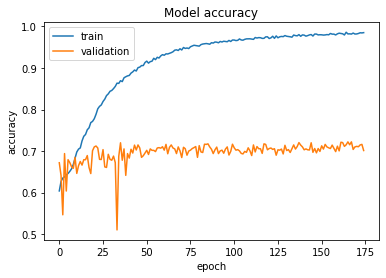

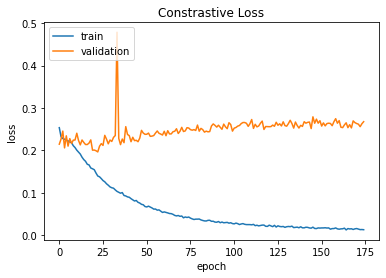

In [ ]:

def plt_metric(history, metric, title, has_valid=True):
    """Plots the given 'metric' from 'history'.

    Arguments:
        history: history attribute of History object returned from Model.fit.
        metric: Metric to plot, a string value present as key in 'history'.
        title: A string to be used as title of plot.
        has_valid: Boolean, true if valid data was passed to Model.fit else false.

    Returns:
        None.
    """
    plt.plot(history[metric])
    if has_valid:
        plt.plot(history["val_" + metric])
        plt.legend(["train", "validation"], loc="upper left")
    plt.title(title)
    plt.ylabel(metric)
    plt.xlabel("epoch")
    plt.show()


# Plot the accuracy
plt_metric(history=siamese.history.history, metric="accuracy", title="Model accuracy")

# Plot the constrastive loss
plt_metric(history=siamese.history.history, metric="loss", title="Constrastive Loss")

In [ ]:
results = siamese.evaluate([x_val_1, x_val_2], labels_val)
print("test loss, test acc:", results)

73/73 [==============================] - 2s 25ms/step - loss: 0.2676 - accuracy: 0.7012
test loss, test acc: [0.26758503913879395, 0.7012141942977905]


73/73 [==============================] - 2s 22ms/step


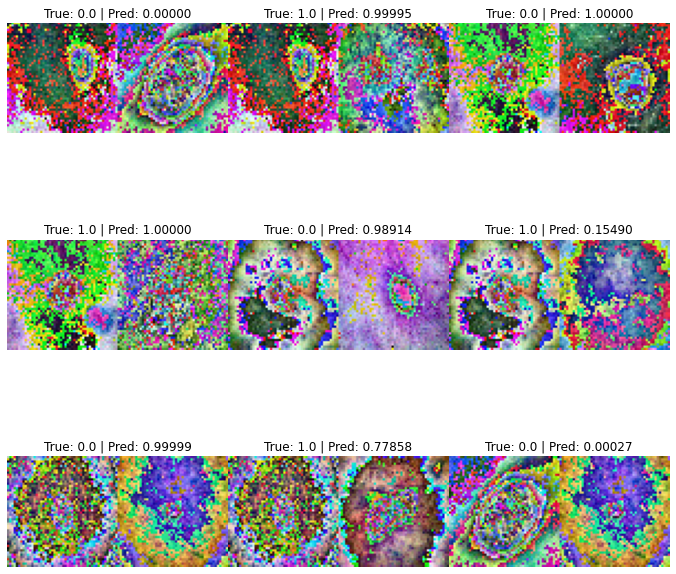

In [ ]:
predictions = siamese.predict([x_val_1, x_val_2])
visualize(pairs_val, labels_val, to_show=10, predictions=predictions, test=True)

Deep vision transformer

In [ ]:
!pip install vit-pytorch

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.2/87.2 KB 4.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.6/41.6 KB 5.4 MB/s eta 0:00:00


In [ ]:
from __future__ import print_function

import glob
from itertools import chain
import os
import random
import zipfile

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from PIL import Image
from sklearn.model_selection import train_test_split
from torch.optim.lr_scheduler import StepLR
from torch.utils.data import DataLoader, Dataset
from torchvision import datasets, transforms
from tqdm.notebook import tqdm

from vit_pytorch.deepvit import DeepViT
from vit_pytorch.simple_vit import SimpleViT

In [ ]:
# Training settings
batch_size = 64
epochs = 30
lr = 3e-5
gamma = 0.7
seed = 42

In [ ]:
def seed_everything(seed):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)
    torch.backends.cudnn.deterministic = True

seed_everything(seed)
device = 'cuda'

In [ ]:
train_dir='/content/content/Train_aug'
test_dir='/content/content/MERGED_DATA/test'
val_dir='/content/content/MERGED_DATA/val'
train_list = []
val_list = []
test_list = []
label=[]
for _ in os.listdir(train_dir):
  cwd=os.path.join(train_dir,_)
  temp=os.listdir(os.path.join(train_dir,_))
  for i in temp:
    train_list.append(os.path.join(cwd,i))
    label.append(_)

for _ in os.listdir(val_dir):
  cwd=os.path.join(val_dir,_)
  temp=os.listdir(os.path.join(val_dir,_))
  for i in temp:
    val_list.append(os.path.join(cwd,i)) 

for _ in os.listdir(test_dir):
  cwd=os.path.join(test_dir,_)
  temp=os.listdir(os.path.join(test_dir,_))
  for i in temp:
    test_list.append(os.path.join(cwd,i))  

print(f"Train Data: {len(train_list)}")

print(f"Val Data: {len(val_list)}")
print(f"Test Data: {len(test_list)}")

Train Data: 48018
Val Data: 2210
Test Data: 1153


/content/content/MERGED_DATA/train/vascular lesion/ISIC_0031270.jpg
/content/content/MERGED_DATA/train/vascular lesion/ISIC_0029439.jpg
/content/content/MERGED_DATA/train/vascular lesion/ISIC_0028680.jpg
/content/content/MERGED_DATA/train/vascular lesion/ISIC_0030722.jpg
/content/content/MERGED_DATA/train/vascular lesion/ISIC_0033608.jpg
/content/content/MERGED_DATA/train/vascular lesion/ISIC_0025807.jpg
/content/content/MERGED_DATA/train/vascular lesion/ISIC_0033254.jpg
/content/content/MERGED_DATA/train/vascular lesion/ISIC_0032866.jpg
/content/content/MERGED_DATA/train/vascular lesion/ISIC_0027256.jpg


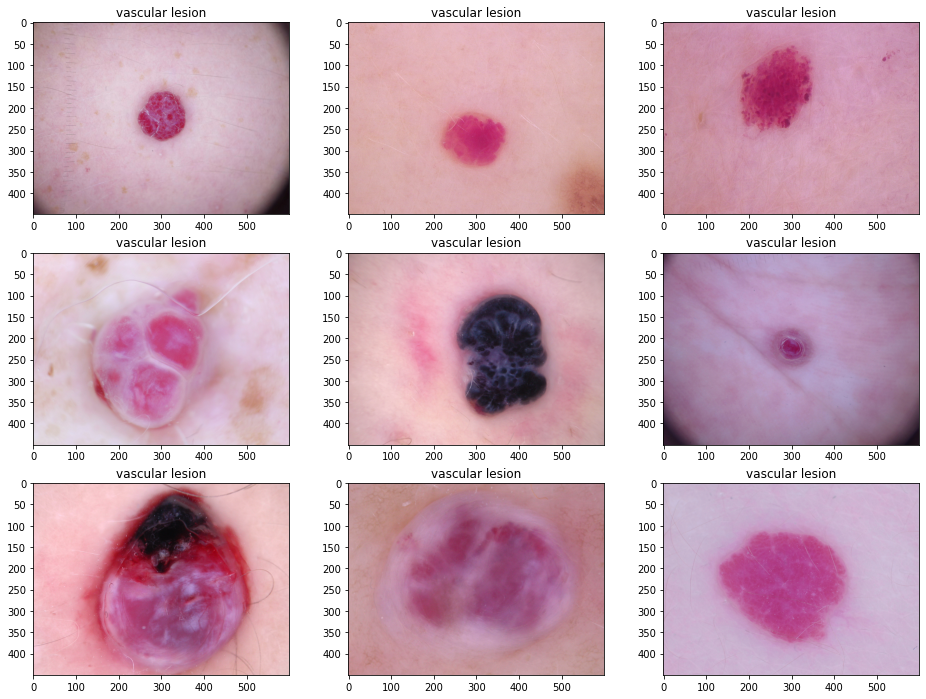

In [ ]:
random_idx = np.random.randint(1, len(train_list), size=9)
fig, axes = plt.subplots(3, 3, figsize=(16, 12))

for idx, ax in enumerate(axes.ravel()):
    print(train_list[idx])
    img = Image.open(train_list[idx])
    ax.set_title(label[idx])
    ax.imshow(img)

In [ ]:
import numpy as np
import cv2
 
from pathlib import Path
 
imageFilesDir = Path(r'/content/content/Train_aug')
files = list(imageFilesDir.rglob('*.jpg'))
 
len(files)
 
mean = np.array([0.,0.,0.])
stdTemp = np.array([0.,0.,0.])
std = np.array([0.,0.,0.])
 
numSamples = len(files)
 
for i in range(numSamples):
    im = cv2.imread(str(files[i]))
    im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
    im=cv2.resize(im,(224,224))
    im = im.astype(float) / 255.
     
    for j in range(3):
        mean[j] += np.mean(im[:,:,j])
       
mean = (mean/numSamples)
 
print(mean) 

[0.8147501  0.57705038 0.60511369]


In [ ]:
for i in range(numSamples):
    im = cv2.imread(str(files[i]))
    im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
    im=cv2.resize(im,(224,224))
    im = im.astype(float) / 255.
    for j in range(3):
        stdTemp[j] += ((im[:,:,j] - mean[j])**2).sum()/(im.shape[0]*im.shape[1])
 
std = np.sqrt(stdTemp/numSamples)
 
print(std) 

[0.13727051 0.17398005 0.18677001]


In [ ]:
import numpy as np
import cv2
 
from pathlib import Path
 
imageFilesDir = Path(r'/content/content/MERGED_DATA/val')
files = list(imageFilesDir.rglob('*.jpg'))
 
len(files)
 
mean = np.array([0.,0.,0.])
stdTemp = np.array([0.,0.,0.])
std = np.array([0.,0.,0.])
 
numSamples = len(files)
 
for i in range(numSamples):
    im = cv2.imread(str(files[i]))
    im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
    im=cv2.resize(im,(224,224))
    im = im.astype(float) / 255.
     
    for j in range(3):
        mean[j] += np.mean(im[:,:,j])
       
mean = (mean/numSamples)
 
print(mean) 
for i in range(numSamples):
    im = cv2.imread(str(files[i]))
    im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
    im=cv2.resize(im,(50,50))
    im = im.astype(float) / 255.
    for j in range(3):
        stdTemp[j] += ((im[:,:,j] - mean[j])**2).sum()/(im.shape[0]*im.shape[1])
 
std = np.sqrt(stdTemp/numSamples)
 
print(std) #[0.28075549 0.25811162 0.28913701]

[0.76137994 0.54921478 0.5679246 ]
[0.14137689 0.15383428 0.1700594 ]


In [ ]:
import numpy as np
import cv2
 
from pathlib import Path
 
imageFilesDir = Path(r'/content/content/MERGED_DATA/test')
files = list(imageFilesDir.rglob('*.jpg'))
 
print(len(files))

mean = np.array([0.,0.,0.])
stdTemp = np.array([0.,0.,0.])
std = np.array([0.,0.,0.])
 
numSamples = len(files)
 
for i in range(numSamples):
    im = cv2.imread(str(files[i]))
    im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
    im = im.astype(float) / 255.
     
    for j in range(3):
        mean[j] += np.mean(im[:,:,j])
       
mean = (mean/numSamples)
 
print(mean) 
for i in range(numSamples):
    im = cv2.imread(str(files[i]))
    im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
    im = im.astype(float) / 255.
    for j in range(3):
        stdTemp[j] += ((im[:,:,j] - mean[j])**2).sum()/(im.shape[0]*im.shape[1])
 
std = np.sqrt(stdTemp/numSamples)
 
print(std) #[0.28075549 0.25811162 0.28913701]

1153
[0.7571041  0.54890883 0.56696436]
[0.14081379 0.15090519 0.16836952]


Image AUgmentation

In [ ]:
train_transforms = transforms.Compose(
    [
        transforms.Resize((224, 224)),
        transforms.RandomResizedCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        
    ]
)

val_transforms = transforms.Compose(
    [
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        
    ]
)


test_transforms = transforms.Compose(
    [
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        
    ]
)


In [ ]:
mp={}
c=0
for _ in sorted(os.listdir('/content/content/MERGED_DATA/train')):
  mp[_]=c
  c+=1
print(mp)

{'actinic keratosis': 0, 'basal cell carcinoma': 1, 'dermatofibroma': 2, 'melanoma': 3, 'nevus': 4, 'pigmented benign keratosis': 5, 'seborrheic keratosis': 6, 'squamous cell carcinoma': 7, 'vascular lesion': 8}


Load dataset

In [ ]:
class Dataset_load(Dataset):
    def __init__(self, file_list, transform=None):
        self.file_list = file_list
        self.transform = transform

    def __len__(self):
        self.filelength = len(self.file_list)
        return self.filelength

    def __getitem__(self, idx):
        img_path = self.file_list[idx]
        img = Image.open(img_path)
        img_transformed = self.transform(img)

        label = img_path.split("/")[-2].split(".")[0]
        label=mp[label]

        return img_transformed, label

In [ ]:
train_data = Dataset_load(train_list, transform=train_transforms)
valid_data = Dataset_load(val_list, transform=test_transforms)
test_data = Dataset_load(test_list, transform=test_transforms)

In [ ]:
train_loader = DataLoader(dataset = train_data, batch_size=batch_size, shuffle=True )
valid_loader = DataLoader(dataset = valid_data, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(dataset = test_data, batch_size=batch_size, shuffle=True)

In [ ]:
print(len(train_data), len(train_loader))

48018 751


In [ ]:
print(len(valid_data), len(valid_loader))

2210 35


In [ ]:
!pip install pytorch_pretrained_vit

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for pytorch_pretrained_vit: filename=pytorch_pretrained_vit-0.0.7-py3-none-any.whl size=11130 sha256=b8adbb752367d665286f2699696d92f005a58309cd4109ca538708468943bf14
  Stored in directory: /root/.cache/pip/wheels/20/16/21/ea75e637c84ae6e3d2c4a546a1f28d19df704ff95ddb77bd47
Successfully built pytorch_pretrained_vit


In [ ]:
from pytorch_pretrained_vit import ViT
model = ViT('L_32_imagenet1k', pretrained=True).to(device)

Loaded pretrained weights.


In [ ]:
model = SimpleViT(
    image_size = 224,
    patch_size = 32,
    num_classes = 9,
    dim = 1024,
    depth = 6,
    heads = 16,
    mlp_dim = 2048
).to(device)

Training

In [ ]:
# loss function
criterion = nn.CrossEntropyLoss()
# optimizer
optimizer = optim.Adam(model.parameters())
# scheduler
scheduler = StepLR(optimizer, step_size=1, gamma=gamma)


In [ ]:
for epoch in range(epochs):
    epoch_loss = 0
    epoch_accuracy = 0

    for data, label in tqdm(train_loader):
        data = data.to(device)
        label = label.to(device)

        output = model(data)
        loss = criterion(output, label)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        acc = (output.argmax(dim=1) == label).float().mean()
        epoch_accuracy += acc / len(train_loader)
        epoch_loss += loss / len(train_loader)

    with torch.no_grad():
        epoch_val_accuracy = 0
        epoch_val_loss = 0
        for data, label in valid_loader:
            data = data.to(device)
            label = label.to(device)

            val_output = model(data)
            val_loss = criterion(val_output, label)

            acc = (val_output.argmax(dim=1) == label).float().mean()
            epoch_val_accuracy += acc / len(valid_loader)
            epoch_val_loss += val_loss / len(valid_loader)

    print(
        f"Epoch : {epoch+1} - loss : {epoch_loss:.4f} - acc: {epoch_accuracy:.4f} - val_loss : {epoch_val_loss:.4f} - val_acc: {epoch_val_accuracy:.4f}\n"
    )

  0%|          | 0/751 [00:00<?, ?it/s]

RuntimeError: ignored

In [ ]:
file_path='/content/drive/MyDrive/simple_vit.pt'
torch.save(model.state_dict(), filepath)

#Later to restore:
model.load_state_dict(torch.load(filepath))
model.eval()

In [ ]:
from keras.applications.vgg16 import VGG16
from keras.applications.vgg19 import VGG19

In [ ]:
vgg19 = VGG19()

574710816/574710816 [==============================] - 25s 0us/step


In [ ]:
model = Sequential()

model.add(VGG19(include_top=False, pooling='max', weights='imagenet',input_shape=(50,50,3)))
model.add(Flatten())
model.add(BatchNormalization())
model.add(Dense(2048, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(1024, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(100, activation='sigmoid'))

model.layers[0].trainable = False

80134624/80134624 [==============================] - 4s 0us/step


In [ ]:
!wget https://mirrors.nxtgen.com/ubuntu-mirror/ubuntu-releases/22.04.2/ubuntu-22.04.2-desktop-amd64.iso

--2023-03-27 16:59:03--  https://mirrors.nxtgen.com/ubuntu-mirror/ubuntu-releases/22.04.2/ubuntu-22.04.2-desktop-amd64.iso
Resolving mirrors.nxtgen.com (mirrors.nxtgen.com)... 103.56.39.228
Connecting to mirrors.nxtgen.com (mirrors.nxtgen.com)|103.56.39.228|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4927586304 (4.6G) [application/octet-stream]
Saving to: ‘ubuntu-22.04.2-desktop-amd64.iso’

ktop-amd64.iso        0%[                    ]  43.87M  1.35MB/s    eta 44m 13s^C


In [ ]:
pip install nbmerge

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for nbmerge: filename=nbmerge-0.0.4-py2.py3-none-any.whl size=6410 sha256=49ec05578dc40480a1f5584fabd6497db7ba5d360d383acdfed601fc409689a6
  Stored in directory: /root/.cache/pip/wheels/0b/a8/31/4ae563f674b488c82ee72cfe0f86487c21532db97ae910b264
Successfully built nbmerge
